<hr>
<font size = 6>ST1511 AIML CA2 Assignment (Clustering) </font>
<hr>
<font size = 3>
Name: Lee Hong Yi<br>
Adm. No: p2223010<br>
Class: DAAA/FT/2A/05
</font>

__Objective:__ <br>
Identify which group of customers are the most valuable to the shopping mall, so that the shopping mall can do something to retain the most valuable customer group.

__Background Information:__<br>
I own a shopping mall, and have some data about my customers, namely their Age, Gender, Income, as well as spending.

__Additional Information:__ <br>
-nil-

__Output Variable:__ <br>
Identify which group of customers are most valuable, and describe the characteristics of each cluster.

In [2]:
# importing base modules
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from typing import Sequence, Tuple
import plotly.figure_factory as ff
from itertools import combinations, chain

# importing modules from sklearn
import sklearn as sk
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, make_scorer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, BisectingKMeans, SpectralClustering, MiniBatchKMeans


#ignoring redundant warnings
from warnings import simplefilter
simplefilter(action='ignore', category=UserWarning)     
simplefilter(action='ignore', category=FutureWarning) 

In [3]:
sns.set_theme();
custom_palette = sns.color_palette("tab10")
sns.set_palette(custom_palette)

<hr>
<font size = 5>Importing the data and manipulating it</font>
<hr>

In [4]:
data = pd.read_csv("./Customer_Dataset.csv")
data = data.drop(columns = ["CustomerID"])
display(data.head(10))

,Gender,Age,Income (k$),How Much They Spend
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


We manipulate the data by removing the "CustomerID" column, as it is irrelevant for modelling.
This is as the column in a index column, and hence will not be able to give us any useful insights when modelling.

<hr>
<font size = 5>Exploratory Data Analysis (EDA)</font>
<hr>

We shall start the customer segmentation by performing EDA, to allow us to get a insight into the data given. This will allow us to have a better understanding of the data, and allow for better analysis and segmentations to be mdae.

Before we start carrying out EDA, we make a copy of the data to prevent the data from accidentally being changed in the process.

In [5]:
eda_data = pd.read_csv("./Customer_Dataset.csv")
display(eda_data.head(10))

,CustomerID,Gender,Age,Income (k$),How Much They Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


From the above, we can see that there are no null values. However, there is a categorial variable that we may have to deal with later.

In [7]:
eda_data.describe([0.05,0.25,0.50,0.75,0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
CustomerID,200.0,100.50,57.879185,1.0,10.95,50.75,100.5,150.25,190.05,200.0
Age,200.0,38.85,13.969007,18.0,19.00,28.75,36.0,49.00,66.05,70.0
Income (k$),200.0,60.56,26.264721,15.0,19.00,41.50,61.5,78.00,103.00,137.0
How Much They Spend,200.0,50.20,25.823522,1.0,6.00,34.75,50.0,73.00,92.00,99.0


Identifying the distribution of gender among the customers.

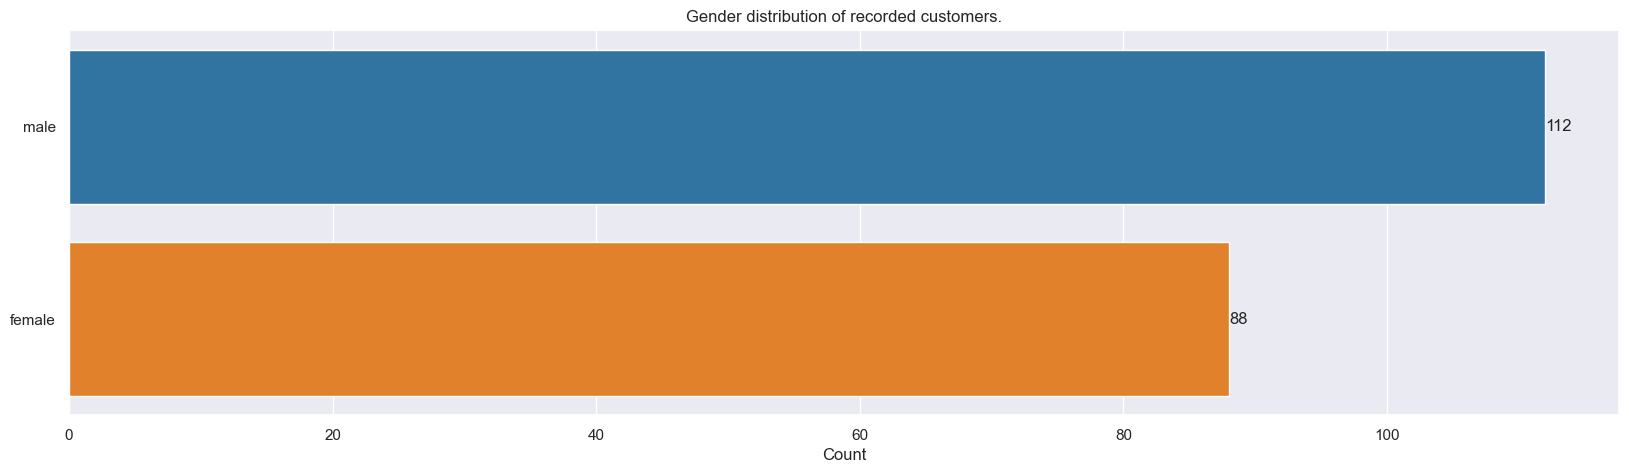

In [8]:
gender_count = pd.value_counts(eda_data["Gender"])
data_count = list(gender_count)
gender_count_dict = dict(male = gender_count[0],female=gender_count[1])
gender_count_dict = pd.DataFrame(data = gender_count_dict, index = ["Count"])
gender_count_dict = gender_count_dict.T
plt.figure(figsize = (20,5))
ax = sns.barplot(data = gender_count_dict, x = "Count", y = gender_count_dict.index)
ax.set(title = "Gender distribution of recorded customers.")
for i in ax.containers:
    ax.bar_label(i,)

Identifying the distribution of the other variables using a boxplot.

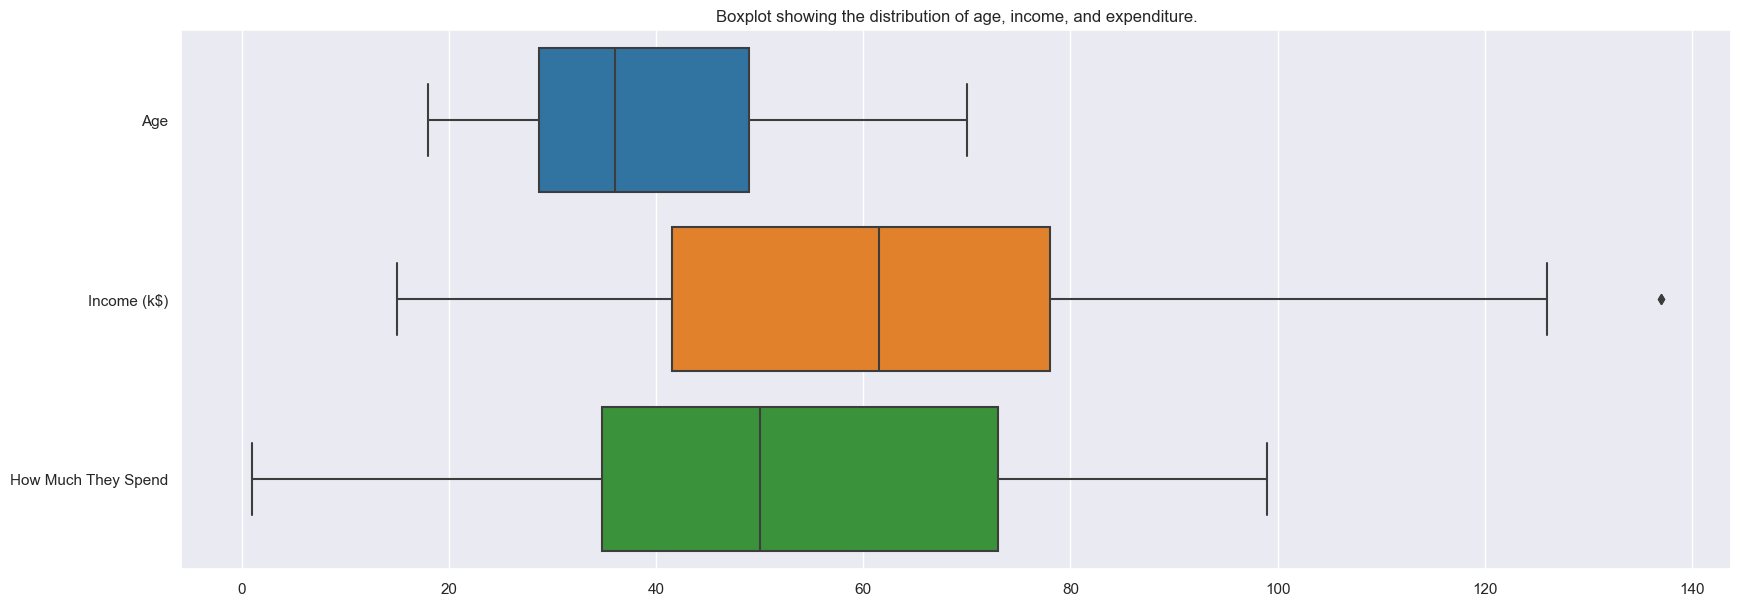

In [9]:
plt.figure(figsize = (20,7))
ax = sns.boxplot(eda_data[["Age","Income (k$)","How Much They Spend"]], orient = 'h')
ax.set(title = "Boxplot showing the distribution of age, income, and expenditure.")
plt.show()

Generating a pairplot to show the distribution between variables, as well as the gender of the customers.

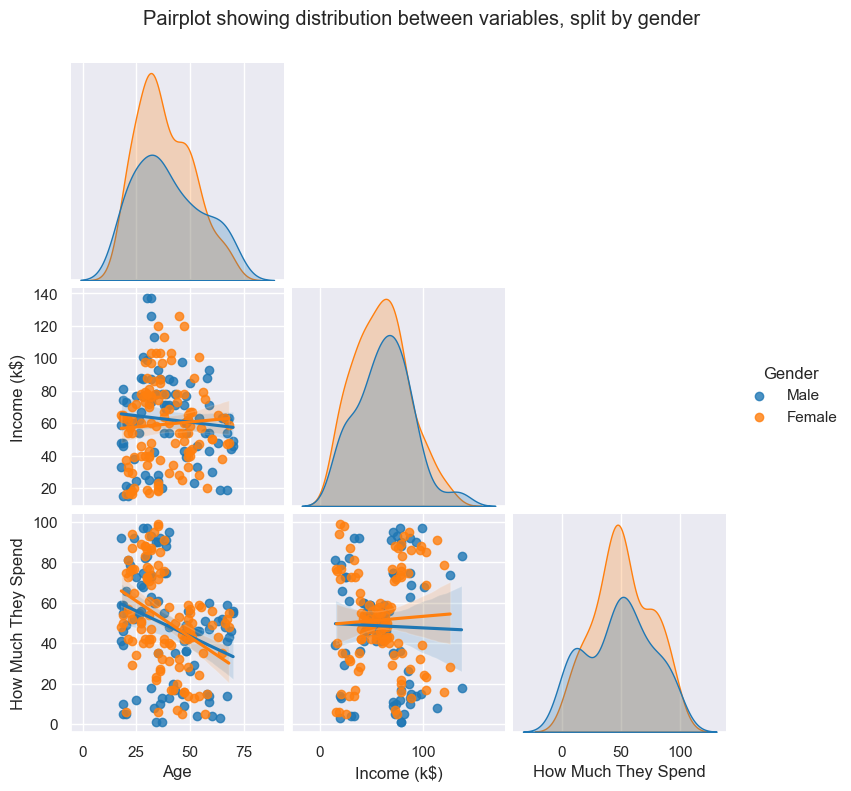

In [10]:
ax = sns.pairplot(eda_data.drop(columns = ["CustomerID"]), hue = "Gender", corner = True, kind = 'reg')
ax.fig.suptitle("Pairplot showing distribution between variables, split by gender", y = 1.05)
plt.show()

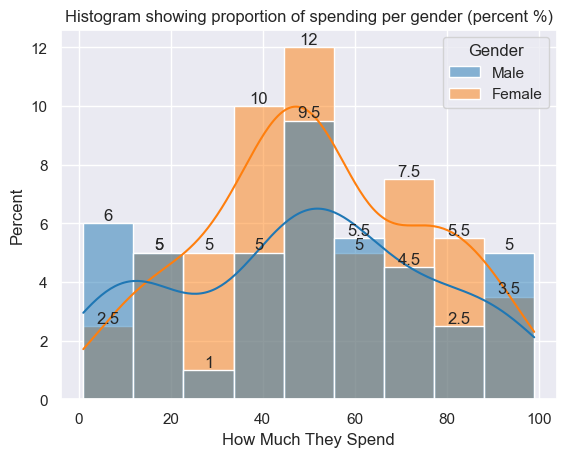

In [11]:
ax = sns.histplot(data = eda_data, x = "How Much They Spend", hue = "Gender", kde = True, stat = 'percent')
ax.set(title = "Histogram showing proportion of spending per gender (percent %)")

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

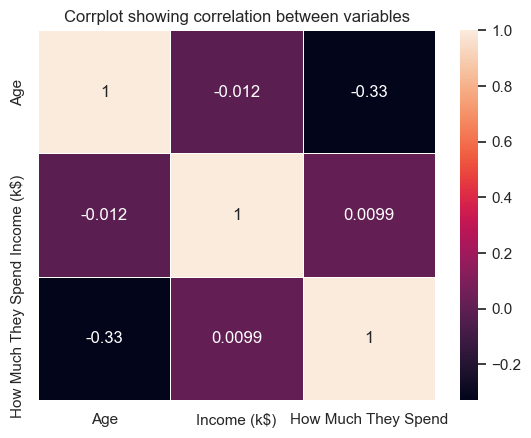

In [12]:
ax = sns.heatmap(eda_data.drop(columns = ["CustomerID"]).corr(), annot = True, linewidths= 0.5)
ax.set(title = "Corrplot showing correlation between variables")
plt.show()

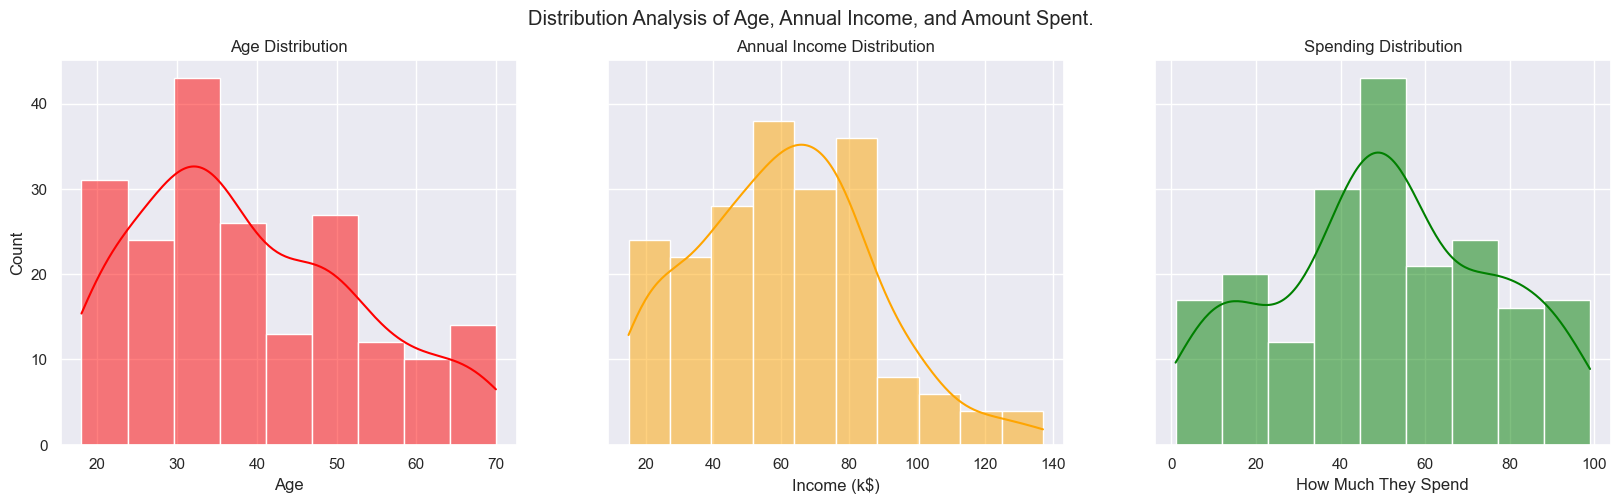

In [13]:
# Create a figure and axis objects
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey = True)

# Plot the distribution of age, annual income, and spending score
sns.histplot(data=eda_data, x='Age', kde=True, color='red', ax=axs[0])
sns.histplot(data=eda_data, x='Income (k$)', kde=True, color='orange', ax=axs[1])
sns.histplot(data=eda_data, x='How Much They Spend', kde=True, color='green', ax=axs[2])

# Set the titles of the plots
axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Distribution')

# Set the title for the entire plot
fig.suptitle('Distribution Analysis of Age, Annual Income, and Amount Spent.')

# Display the plots
plt.show()

We shall also do a 3d scatter plot to make it easier to see any potential clusters, espcially accross different dimensions.

In [14]:
fig = px.scatter_3d(eda_data, x = "Age", y = "Income (k$)", z = "How Much They Spend", color = "Gender", width = 800, height = 800)
fig.update_layout(scene_aspectmode='cube')
fig.show()

From the EDA, we can make the following observations:
- We can see that the median age is 39 years old. With a standard deviation of 13.96, it is quite spread out.
- The average income is 60 thousand dollars. It is also quite spread out, with a standard deviation of 26 thousand dollars.
- The average amount spent is also quite spread out, with a standard deviation of 25$, and a mean of $50.20.
- From the histogram, we can see that females tend to spend more than males, with a much higher peak at 50% compared to males, who have spending more evenly spread across the spectrum.
- From the 3-D scatterplot, there are a few clusters which can already be seen.

<hr>
<font size = 5>Data Preparation / Feature Engineering <br></font>
<hr>

Given that there are categorical variables in the dataset, we shall perform one-hot encoding to transform them into numerical variables, so that it can be handled by our clustering model. To accomplish this, we shall use `pd.get_dummies()`
<br>

However, we shall also drop the Gender_Male column generated by the function, to force the gender variable to become dichtomous. Dichotomous variables allow the data to be homogenous, helping avoid undue influence. In addition, we shall also do this to make our data more compatible with clustering algorithms.
<br>

Another method that we can potentially use to help our clustering model would be to use __Gower's Distance__ , which is a measure of how different two records are. As Gower's Distance is able to handle data which is logical, numerical, categorical, or text, it can be a good way to help us deal with the categorical "Gender" feature present in the dataset. However, we shall not use Gower's Distance for this analysis, as it may be harder to interpret. Gower's Distance is also sensitive to the scaling of numerical attributes, and vastly different scales in the origin data may result in negative outcomes when clustering. As the data given has different scales, such as "Age" and "How Much They Spend", we shall avoid using Gower's Distance. Furthermore, while Gower distance is designed to work well with many clustering algorithms, not all clustering algorithms can directly utilize Gower distance. Some algorithms require the data to be in a specific format or rely on specific assumptions about the distance metric.
<br>

In addition, we will also use `sklearn.preprocessing.StandardScaler()` to standardize the data, so that the euclidean distances between points are calculated in a meaningful manner. This is a concern to us, as many clustering algorithms use distance measures to calculate the similarity between data points. We use `sklearn.preprocessing.StandardScaler()` instead of `sklearn.preprocessing.MinMaxScaler()`, as `sklearn.preprocessing.StandardScaler()` preserves the information in outliers, and is less sensitive to outliers.
<br>

While `sklearn.prepreocessing.StandardScaler()` modifies the distribution of data in the dataset to follow standard distribution, which may typically not be advised for machine learning, it is actually beneficial for a clustering model, as typical clustering models are based on distance, and measures similarities between data points using distance metrics. By removing any bias in the data, we allow the the data to be accurately represented, and for the model to be unbiased in its decisions.
<br>

In addition, we will not perform any kind of dimensionality reduction, such as __Principal Component Analysis (PCA)__ or __T-Distributed Stochastic Neighbor Embedding (T-SNE)__, as there are already a low number of features in this dataset. If any dimensions are removed, it will result in a loss of information, which we cannot afford.

In summary, we shall perform 2 steps in data preperation, namely:
<li>1. Standard Scaling
<li>2. Dichtomizing the gender variable.

In [15]:
data = pd.get_dummies(data)
data = data.drop(columns = ["Gender_Female"])
data = data.rename(columns = {"Gender_Male":"Gender"})
display(data.head(10))

,Age,Income (k$),How Much They Spend,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
6,35,18,6,0
7,23,18,94,0
8,64,19,3,1
9,30,19,72,0


From here onwards, the gender column will indicate 0 for male, and 1 for female.

In [16]:
columns = ["Age","Income (k$)","How Much They Spend"]

scaler = StandardScaler()
scaler.fit(data[columns])
data[columns] = pd.DataFrame(scaler.transform(data[columns]), columns = columns)

display(data.head(10))

,Age,Income (k$),How Much They Spend,Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
5,-1.209269,-1.662660,1.001596,0
6,-0.276302,-1.624491,-1.715913,0
7,-1.137502,-1.624491,1.700384,0
8,1.804932,-1.586321,-1.832378,1
9,-0.635135,-1.586321,0.846310,0


However, there is another way that we can handle the categorical feature. We can test combinations of features to see if the feature has a large impact on the quality of our clusters, by testing combinations of features, dropping 1 at a time. Here, we use k-means as a sample model, as it is simple compared to other models.

To evaluate the quality of the fits, we shall use both Inertia and Silhouette Score to measure the quality of the fits.

In [17]:
seed = 24

In [18]:
logs = []
k_range = np.arange(2,11,1) # Range of k values
feature_sets = chain(combinations(data.columns,3), combinations(data.columns,4))

def calculate_k_mean(n_cluster: int, X: Sequence)-> Tuple[float, Sequence]:
    kmean = KMeans(n_clusters = n_cluster, random_state = seed)
    cluster_labels = kmean.fit_predict(X)
    return kmean.inertia_, cluster_labels

for features in feature_sets:
    for k in k_range:
        inertia, cluster_labels = calculate_k_mean(k, data[list(features)])
        silhouettes_avg = silhouette_score(data, cluster_labels)
        logs.append([features, k, inertia, silhouettes_avg])
        
records_df = pd.DataFrame(logs, columns=['Features', 'k', 'Inertia', 'Silhouettes_Avg'])
fig = px.line(records_df, x = "k", y = "Inertia", color = "Features", markers = True)
fig2 = px.line(records_df, x = "k", y = "Silhouettes_Avg", color = "Features", markers = True)

fig.show()
fig2.show()

From the above two plots, we can see that there is a very little difference between dropping the "Gender" column, and keeping it in the data. Hence, there is no valid reason to drop the feature. In addition, as we have only 4 features, dropping it will result in a significant loss of information.
Furthermore, we can also use the gender feature later to identify trends that we may not be able to see from just metrics like Silhouette Score, as a cluster may be dominated by a gender, which the metric will not reflect.

<hr>
<font size = 5>Initial Clustering</font>
<hr>

However, before we start carrying out clustering on different models, we shall first find out the optimum number of clusters to use (value of k). <br>
To determine the optimum value of k, we shall use a few scoring metrics, namely, the Elbow Method using the Inertia metric, as well as Silhouette Score.
<br>
<br>
Inertia is a measure for how well a set of data points have been clustered. It is calculated by taking the sum of squared distances being each data point, and its cluster's centroid, which is the mean of all data points in the cluster. The lower this metric is, the better the clustering. The general idea is that inertia will decrease as the number of clusters increase. Having too many clusters may result in overfitting, as well as making it hard to interpret the results. Hence, the optimal number of clusters for the dataset is can be identified when the inertia stops decreasing at a steady pace, and starts to plateau. (also called the elbow.)
Hence, it is called the elbow method, as we identify when the inertia starts to plateau.
<br>
The formula for inertia is as follows:
\begin{aligned}
\text{Inertia} &= \sum\limits_{i=1}^m
\left\| x^{(i)} - \mu c^{(i)} \right\|^2_2 \\
x_i &= \text{The $i$th data point} \\
c_i &= \text{The mean of the $i$th data point} \\
\mu &= \text{The overall mean of all the data points} \\
\left\| x - y \right\|^2_2 &= \text{The Euclidean distance between two points $x$ and $y$}
\end{aligned}
<br>
<br>
We can also use the Silhouette Coefficient to measure the quality of the fit. It is a measure of how well a data point is clustered, and is calculated by taking the difference between the average intra-cluster distance and average inter-cluster distance for a datapoint. It can be between 1 and -1, with 1 indicating a well-clustered datapoint, and -1 indicating a badly clustered one. The average intra-cluster distance is the average distance between the data point and all the other datapoints in its cluster, while the inter-cluster distance is the average distance between the datapoint and all datapoints in other clusters. Once those two values have been calculated, the silhouette coefficient can be computed.
<br>
The formula for the Silhouette Coefficient is as follows:
\begin{align*}
\text{Silhouette Coefficient} &= \frac{b - a}{max(a, b)} \\
a &= \text{average intra-cluster distance} \\
b &= \text{average inter-cluster distance}
\end{align*}

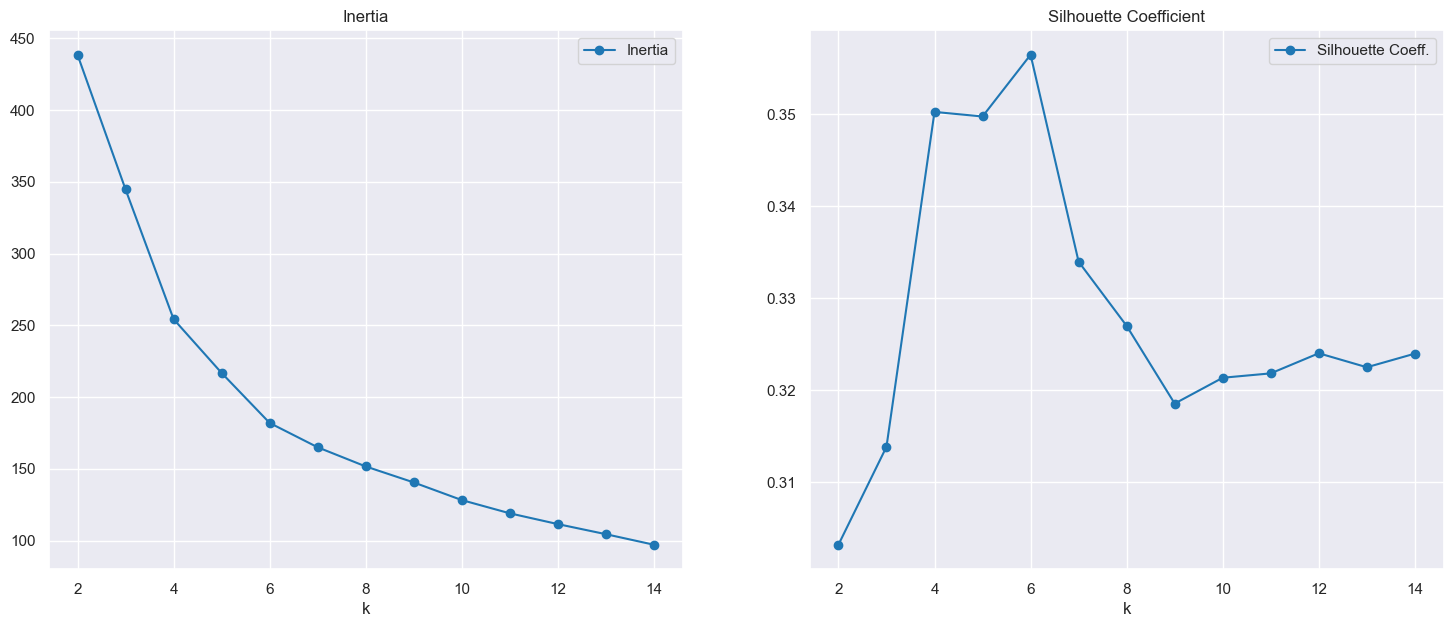

The maximum silhouette score of 0.356 is obtained when k = 6


In [19]:
init_data = data.copy()

#creating variables for use
def get_init_data(i):
    globals() ["init_data_" + str(i)] = init_data.copy()
    return globals() ["init_data_" + str(i)]
def get_init_center(i):
    globals() ["init_center_" + str(i)] = pd.DataFrame(columns = ["Cluster", "age_center","income_center","spend_center","gender_center"])
    return globals() ["init_center_" + str(i)]

list_init_data = [get_init_data(i) for i in range(2, 15)]
list_init_center = [get_init_center(i) for i in range(2, 15)]
sil_pd = pd.DataFrame(columns= ["k","Silhouette Coeff."])
sil_pd.set_index("k")
inertia_pd = pd.DataFrame(columns= ["k","Inertia"])
inertia_pd.set_index("k")
init_k_range = np.arange(2,16,1)


# calculating inertia and silhouette coeff.
for init_arr, init_center, i in zip(list_init_data, list_init_center, init_k_range):
    init_center["Cluster"] = np.arange(1, i+1)
    init_arr = pd.DataFrame(init_arr)
    init_model = KMeans(n_clusters = i, random_state = seed)
    gen_clusters = init_model.fit_predict(data)
    cnt = 0
    for c in init_model.cluster_centers_:
        init_center.iloc[cnt, 1:5] = c
        cnt += 1

    sil_score = silhouette_score(init_arr, gen_clusters)
    inertia_score = init_model.inertia_
    
    sil_pd.loc[len(sil_pd)] = ([i, sil_score])
    inertia_pd.loc[len(inertia_pd)] = ([i, inertia_score])
    #reverting the scaled data back into the normal version for visualization later
    init_arr[columns] = scaler.inverse_transform(init_arr[columns])
    init_arr = init_arr.insert(4, "Cluster", gen_clusters)
    # display(init_center)
    init_center[['age_center',"income_center","spend_center"]] = scaler.inverse_transform(init_center[['age_center',"income_center","spend_center"]])



# generating graphs
fig, (ax2, ax1) = plt.subplots(1,2, figsize = (18,7))
sil_pd.plot(ax = ax1, marker = "o", y = "Silhouette Coeff.", x = "k")
ax1.set_title("Silhouette Coefficient")
inertia_pd.plot(ax = ax2, marker = "o", y = "Inertia", x = "k")
ax2.set_title("Inertia")
plt.show()
print(f"The maximum silhouette score of {sil_pd.max()[1]:.3f} is obtained when k = {sil_pd.idxmax()[1] + 2}")

<font size = 5> <u>__Results__</u> </font><br>

From the analysis on inertia, we can see that the typical trend is followed, with inertia decreasing, while k is increasing. However, there results from the inertia analysis are rather ambigious, as there is no clear elbow for us to use.
<br>
<br>
From the analysis on the silhouette coefficient, we can see that the highest silhouette value is obtained when the value of k is 6. We can also see that the silhouette coefficient is higher when the value of k is between 4 and 6. Using these findings, we can see that the best value of k to use is also 6.
<br>

However, as the silhouette coefficient is higher between 4 and 6, we shall use a silhouette plot to see the effectiveness of the clustering, and allows us to make better decisions regarding the value of k to use.

In [20]:
def plot_silhouette(X, labels):
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    fig, ax = plt.subplots(figsize = (15,3))
    y_lower = 10

    for i in np.unique(labels):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.colormaps.get_cmap("nipy_spectral")(float(i) / np.max(labels))
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)

        # Label the silhouette plots with their cluster number at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")
    ax.set_title("Silhouette Plot for Clustering")
    ax.axvline(x = silhouette_avg, color = "black", linestyle = "--")
    ax.set_yticks([])  # Clear the y-axis labels / ticks
    plt.show()

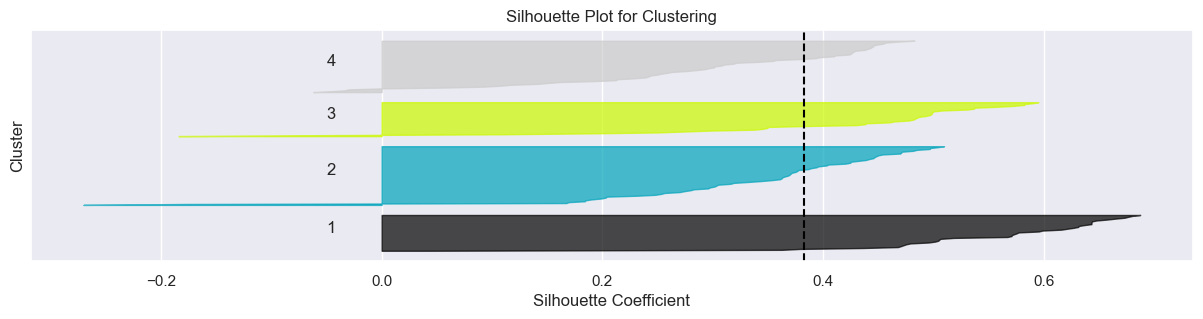

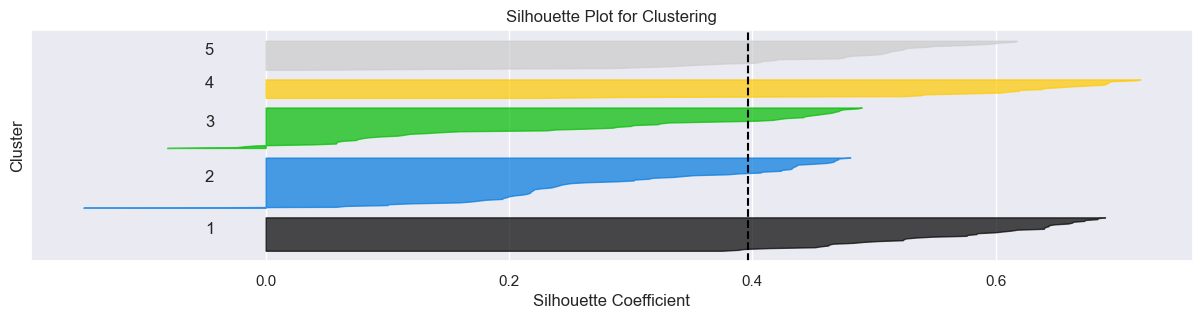

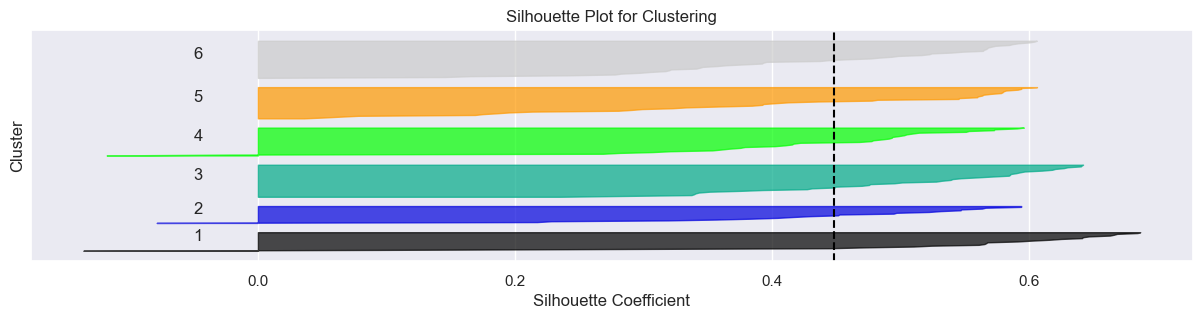

In [21]:
sil_analysis_arr = [init_data_4, init_data_5, init_data_6]

for target in sil_analysis_arr:
    plot_silhouette(target[columns], target["Cluster"])

x

In [22]:
ideal_k = int(6)

Now that we have identified that the best value of k to use, we can visualise how our trial KMeans model performed when we performed our initial clustering.<br>
Before we do that, we shall first create a function to make it easier when attempting to visualize clustering results.

To help us identify which clustering models are best to use, we shall use a combination of silhouette score, as well as the Calinski-Harabasz Index (Variance Ratio Criterion). The Calinski-Harabasz Index is the ratio of the sum of between-cluster and within-cluster dispersion for all clusters. A model scores higher on the index when the clusters are dense and well seperated. The formula for the index is:

\begin{aligned}
\text{Calinski-Harabasz Index} &= \frac{B(k)}{W(k)} \times \frac{N - k}{k - 1}\\
B(k) &= \text{the between-cluster sum of squares}\\
W(k) &= \text{the within-cluster sum of squares}\\
N &= \text{total number of data points}\\
B(k) &= \text{number of clusters}\\
\end{aligned} \\


In [23]:
sil_model_score = {}
ch_model_score = {}


def cluster_visualization(input_df, centroid_arr = None, suptitle = "Clustering Results", inversed = True):
    sil_score = silhouette_score(input_df[columns], input_df['Cluster'])
    ch_score = calinski_harabasz_score(input_df[columns], input_df['Cluster'])
    if inversed == False:
        input_df[columns] = scaler.inverse_transform(input_df[columns])

    fig, (ax1, ax2) = plt.subplots(1,2, figsize =(18,7))
    plt.suptitle(suptitle, fontsize = 20)
    sns.scatterplot(input_df, x = "How Much They Spend", y = "Age", hue = "Cluster", palette = custom_palette, ax = ax1)
    ax1.set_title("Age against Amount Spent")
    sns.scatterplot(input_df, x = "How Much They Spend", y = "Income (k$)", hue = "Cluster", palette = custom_palette, ax = ax2)
    ax2.set_title("Income against Amount Spent")
    print(f"The silhouette score for the {suptitle} model is {sil_score:.4f}")
    print(f"The score on the Calinski-Harabasz Index for the {suptitle} model is {ch_score:.4f}")


    if centroid_arr is not None:
        if inversed == False:        
            centroid_arr[["age_center", "income_center", "spend_center"]] = scaler.inverse_transform(centroid_arr[["age_center", "income_center", "spend_center"]])
        sns.scatterplot(centroid_arr, x = "spend_center", y = "age_center", ax = ax1, s = 250, marker = "4", color = 'black')
        sns.scatterplot(centroid_arr, x = "spend_center", y = "income_center", ax = ax2, s = 250, marker = "4", color = 'black')

    sil_model_score[suptitle] = sil_score
    ch_model_score[suptitle] = ch_score

__**K-Means Clustering**__
<hr>

K-Means is a centroid based clustering algorithm, and aims to partition data points into clusters, which each cluster being represented by it's respective centroid, or it's mean. It uses a iterative process to minimize the sum of the squared distanced between data points and the centroids of the assigned cluster. The process is started by placing different averages (randomly initalized values, or set to existing points) on a plane. The algorithm will then go thru the data points one by one, and measure the distance between a data point and it's respective centroid. Then, the data point is assinged to the cluster with the least distance. Once each data point is assigned to a centroid/cluster, the means are re-calculated, and the new value of the centroid is calculated by taking the means of each data point in the cluster. The cycle is then repeated, until no more changes are recorded in the centroids.

The silhouette score for the K-Means Clustering model is 0.4480
The score on the Calinski-Harabasz Index for the K-Means Clustering model is 164.0963


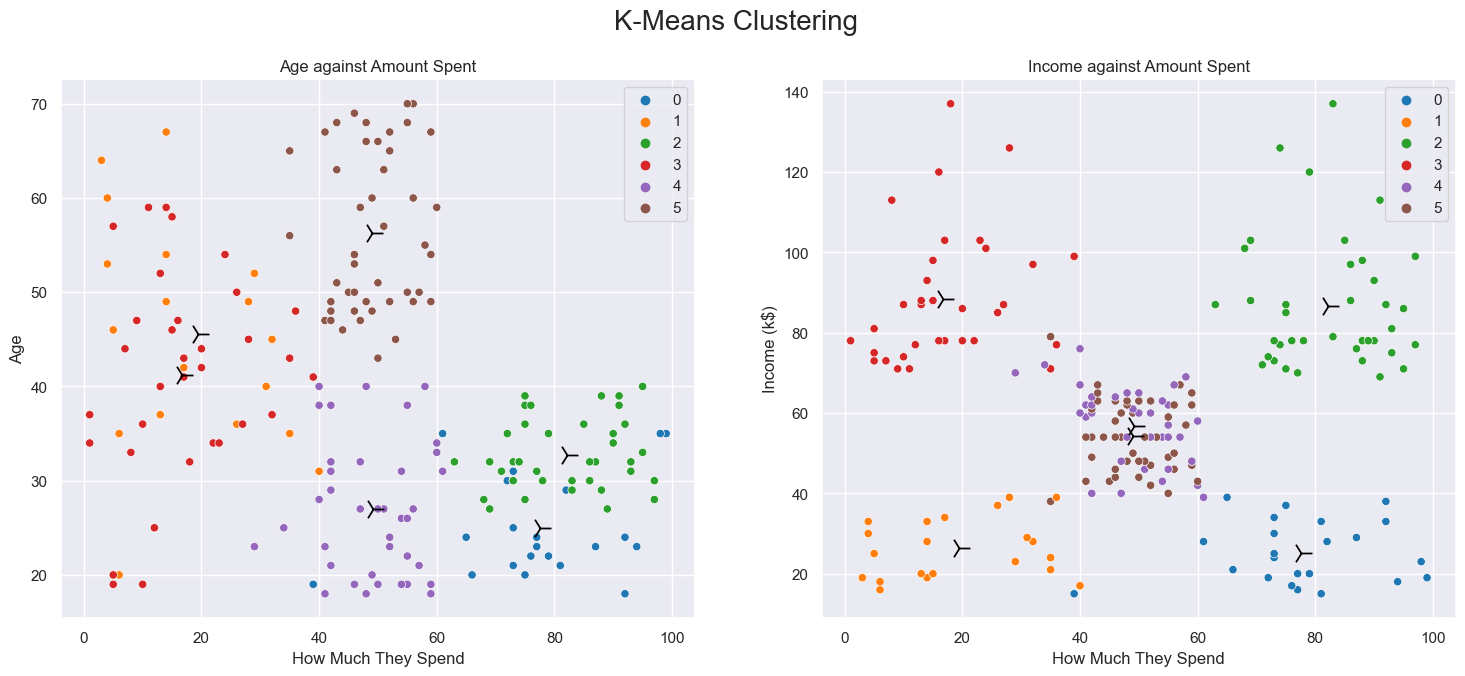

In [24]:
cluster_visualization(init_data_6, init_center_6, "K-Means Clustering")

__**Agglomerative Hierarchical Clustering**__
<hr>

Agglomerative Clustering is the most common type of hierarchical clustering, and is used to group objects in clusters based on their similarity. The algorithm starts by treating each object as it's own cluster. At each step of the algorithm, it merges the two most similar clusters into a bigger cluster. The algorithm runs until all members are just part of one big cluster.

The silhouette score for the Agglomerative Clustering model is 0.4166
The score on the Calinski-Harabasz Index for the Agglomerative Clustering model is 127.2480


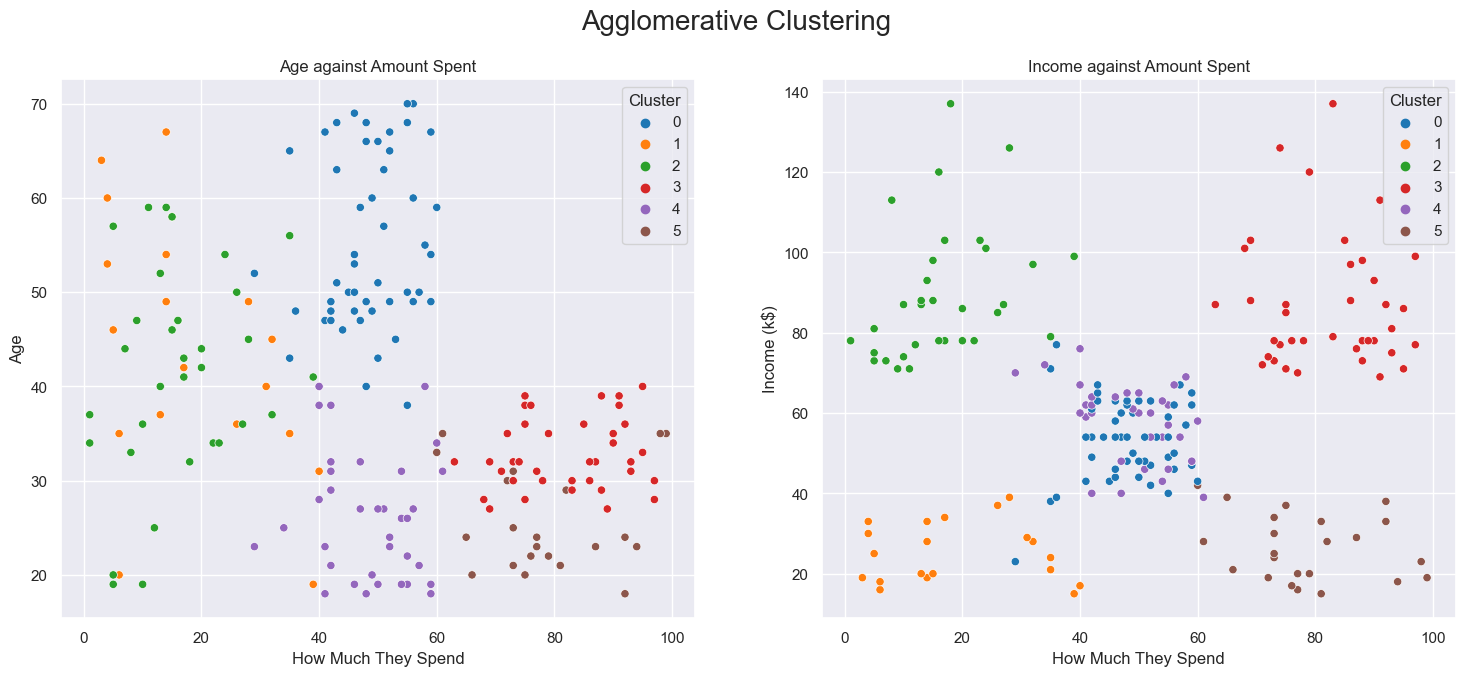

In [25]:
agg_data = data.copy()
agg_dist = linkage(agg_data, 'ward')
agg_model = AgglomerativeClustering(n_clusters = ideal_k)
agg_data["Cluster"] = agg_model.fit_predict(agg_data)
cluster_visualization(agg_data, suptitle = "Agglomerative Clustering", inversed = False)


From the clusters formed, we can see that there are small overlaps within clusters, notably when looking at Age compared to Amount Spent, such as between clusters 1 and 2, and clusters 3 and 5.

 Since agglomerative clustering is hierachical, we can plot a dendogram to show the distances between clusters, and further validate the value of k, and quality of our existing clusters.

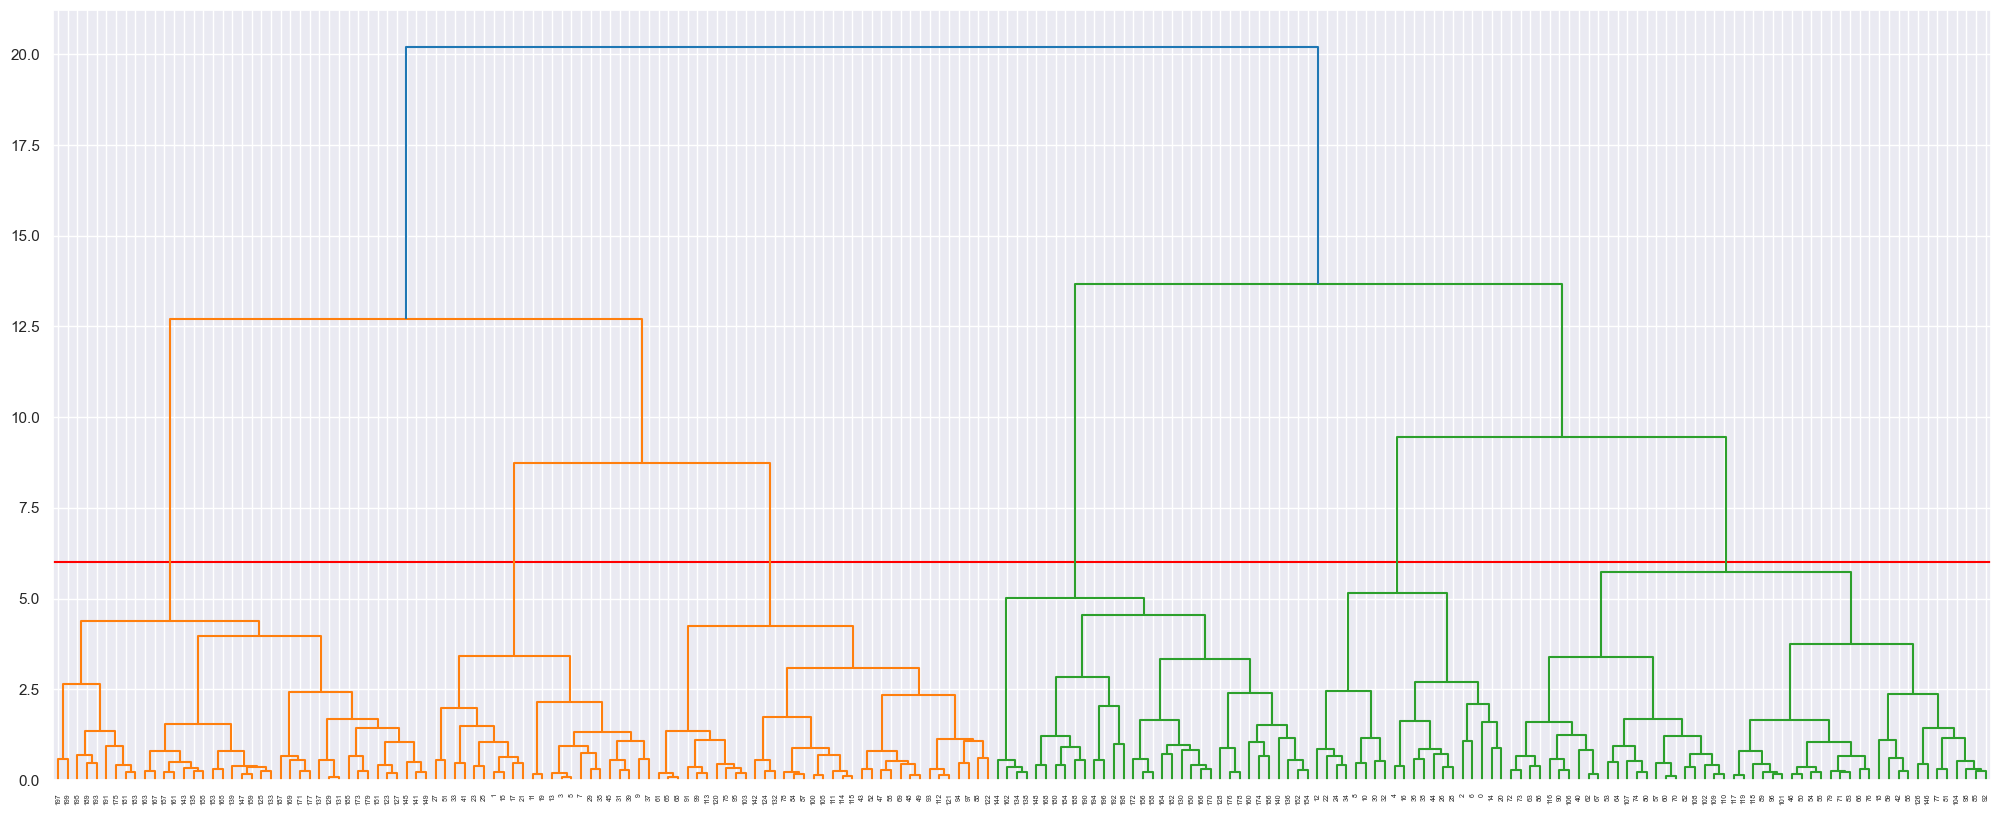

In [26]:
fig = plt.figure(figsize=(25, 10))
plt.axhline(y=6, color = "red")
dn = dendrogram(agg_dist)
plt.show()

From the dendrogram, we can see that there is good seperation between clusters at 6. Hence, this further validates the choice to set the value of k at 6.

**__Density-Based Spatial Clustering of Applications with Noise (DBSCAN)__**
<hr>

DBSCAN is a density-based clustering algorithm. It groups together data points which are closely packed, while marking outliers as noise. The key idea behind the model is that for each point of a cluster, there has to be a certain number of points in it's radius. It identifies core points, then expands them to reach neighbouring points. Points that are not part of any cluster are classified as noise/outliers. DBSCAN works by checking if there a mininum number of points within epsilon distance of a point. If there are, the point is considered a core point. Then, it adds all points within epsilon distance of the core point to the cluster. It repeats this until no more points can be added to any cluster. Points which are not part of a cluster are classified as noise/outliers. 

The silhouette score for the DBSCAN model is -0.1863
The score on the Calinski-Harabasz Index for the DBSCAN model is 10.3907


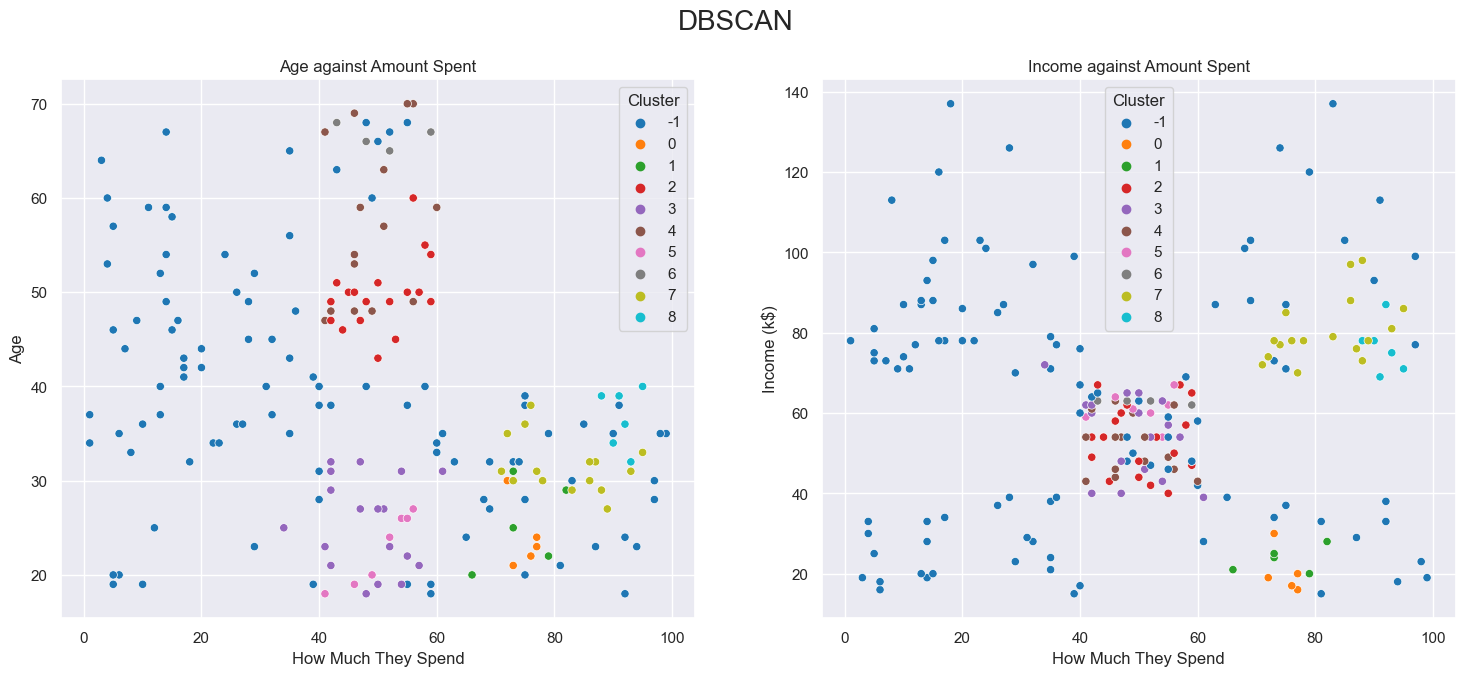

In [27]:
db_data = data.copy()
db_model = DBSCAN()
db_data["Cluster"] = db_model.fit_predict(db_data)
cluster_visualization(db_data, suptitle = "DBSCAN", inversed = False)


**__Bisecting K-Means__**
<hr>

Bisecting K-Means is a hybrid of partitional and hierarchical clustering, and can recognize clusters of any size and shape. Bisecting K-Means works by intializing a single, large cluster. It then splits the cluster into two smaller clusters. Then, it identifies the cluster with the larger SSE metric, and splits that cluster. It repeats this splitting process until the desired number of clusters are reached. It then assigns each data point based on the cluster that it is closest to.

The silhouette score for the Bisecting K-Means model is 0.4219
The score on the Calinski-Harabasz Index for the Bisecting K-Means model is 131.6552


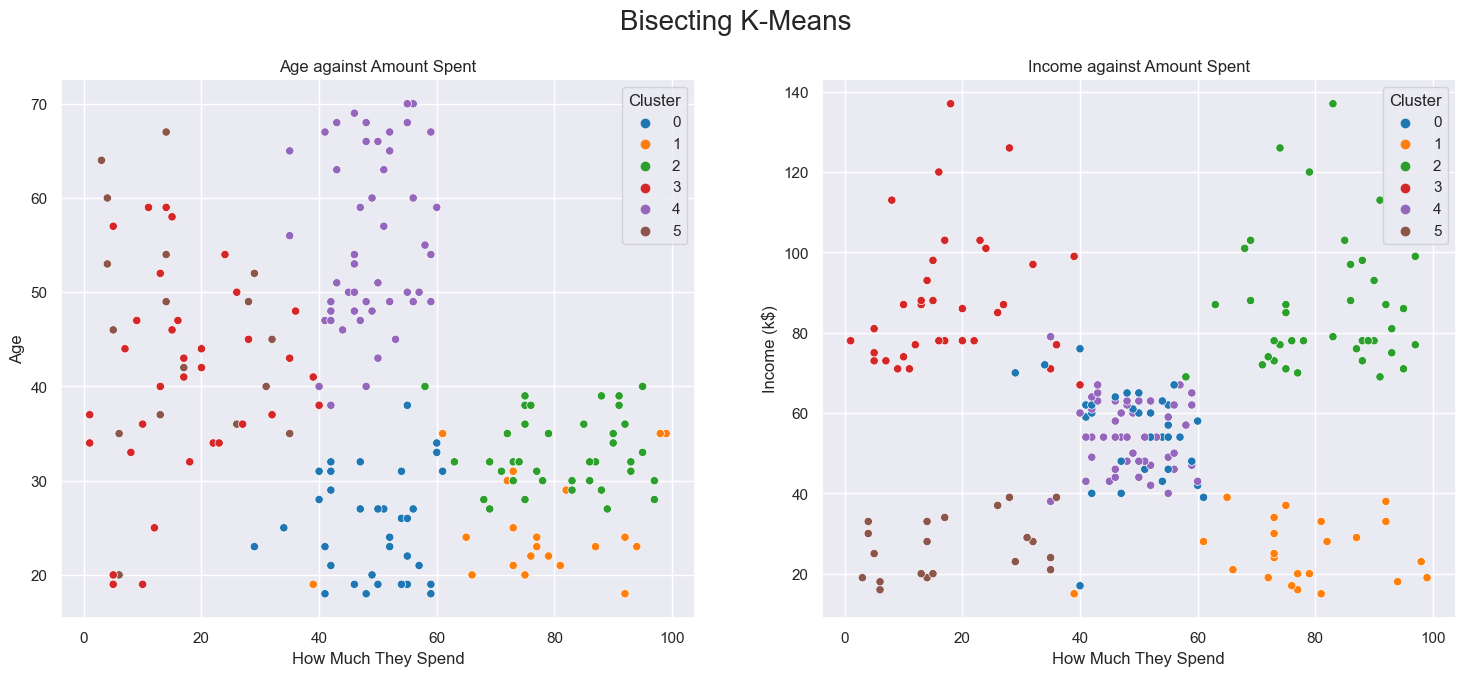

In [28]:
bikmeans_data = data.copy()
bikmeans_model = BisectingKMeans(n_clusters=ideal_k, random_state = seed)
bikmeans_data["Cluster"] = bikmeans_model.fit_predict(bikmeans_data)
cluster_visualization(bikmeans_data, suptitle = "Bisecting K-Means", inversed = False)

**__Spectral Clustering__**
<hr>

Spectral Clustering is a clustering algorithm which uses the connectivity between data points to form the cluster. It uses eigenvalues of the similarity matrix of the data to perfrom dimensionality reduction, then clusters in fewer dimensions. The similarity matrix is then provided as an input, and consists of a quantitiative assessment of the relative similarity of each pair of points of the dataset.

The silhouette score for the Spectral Clustering model is 0.4173
The score on the Calinski-Harabasz Index for the Spectral Clustering model is 125.4510


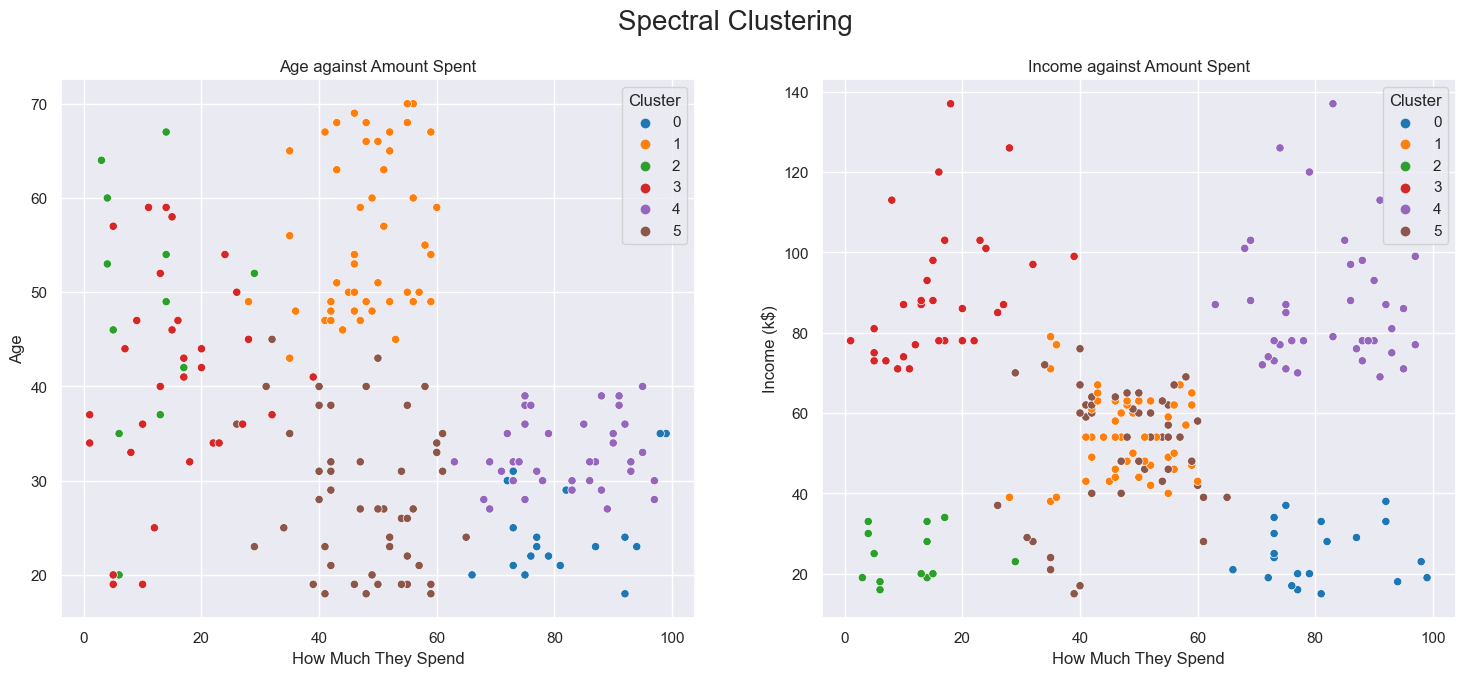

In [29]:
spectral_data = data.copy()
spectral_model = SpectralClustering(n_clusters=ideal_k, random_state = seed)
spectral_data["Cluster"] = spectral_model.fit_predict(spectral_data)
cluster_visualization(spectral_data, suptitle = "Spectral Clustering", inversed = False)

**__Gaussian Mixture Model__**
<hr>

GaussianMixture is a probabilistic model-based clustering algorithm based on Gaussian mixture models (GMM). It assumes that the data points are generated from a mixture of several Gaussian distributions. The algorithm iteratively estimates the parameters of the Gaussian components using the Expectation-Maximization (EM) algorithm.

The silhouette score for the Gaussian Mixture model is -0.1878
The score on the Calinski-Harabasz Index for the Gaussian Mixture model is 5.5751


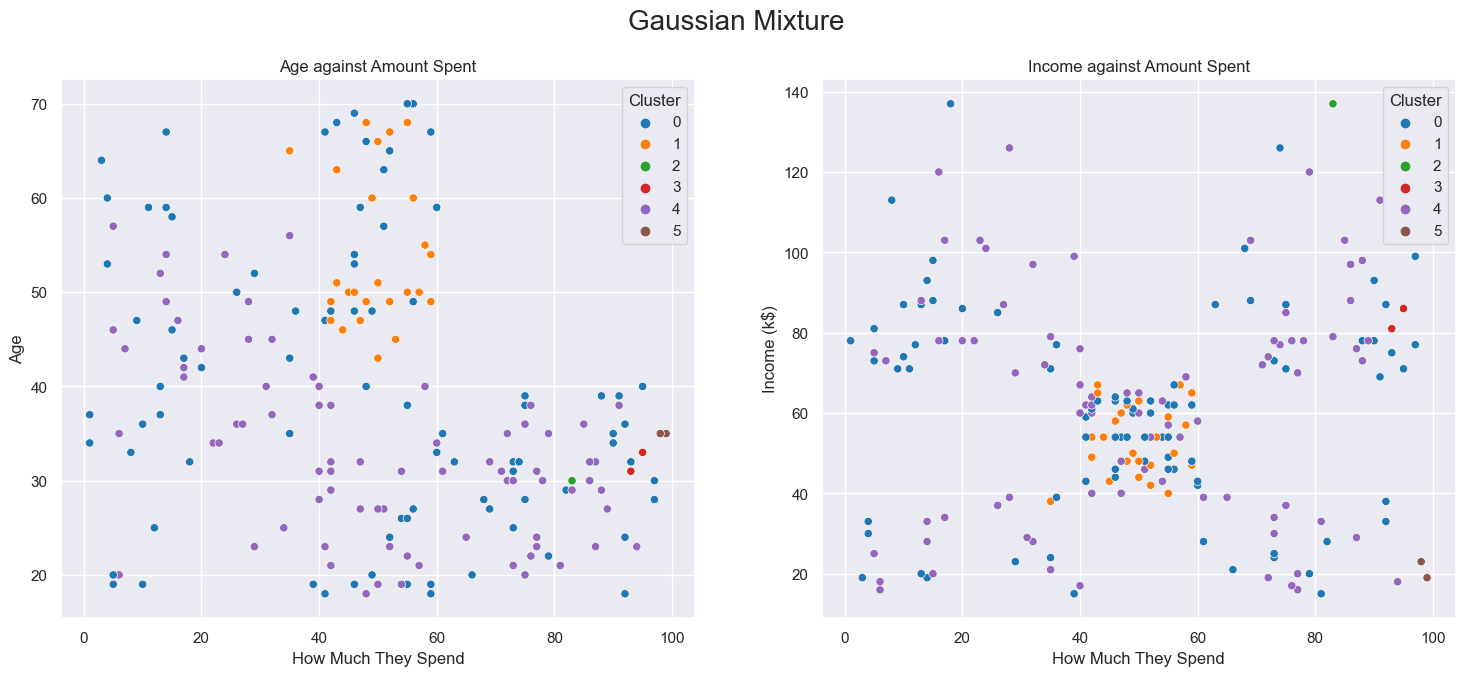

In [30]:
gmm_data = data.copy()
gmm_model = GaussianMixture(n_components=ideal_k, random_state = seed)
gmm_data["Cluster"] = gmm_model.fit_predict(gmm_data)
cluster_visualization(gmm_data, suptitle = "Gaussian Mixture", inversed = False)

**__Bayesian Gaussian Mixture Model__**
<hr>

BayesianGaussianMixture is an extension of GaussianMixture that introduces prior probabilities over the number of components in the model, making it suitable for automatically determining the optimal number of clusters. It uses Bayesian inference to estimate the number of components and their parameters.

The silhouette score for the Bayesian Gaussian Mixture model is -0.0550
The score on the Calinski-Harabasz Index for the Bayesian Gaussian Mixture model is 21.3621


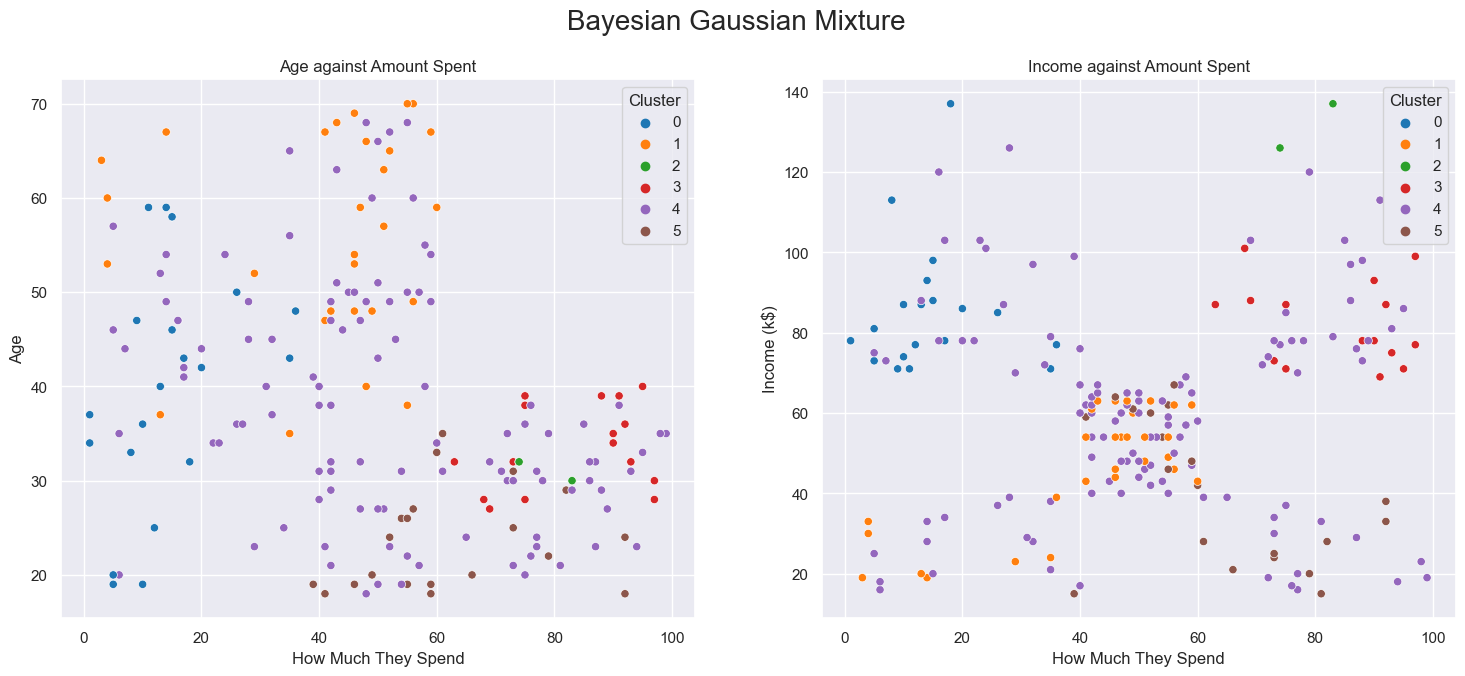

In [31]:
bgmm_data = data.copy()
bgmm_model = BayesianGaussianMixture(n_components=ideal_k, random_state = seed)
bgmm_data["Cluster"] = bgmm_model.fit_predict(bgmm_data)
cluster_visualization(bgmm_data, suptitle = "Bayesian Gaussian Mixture", inversed = False)

**__MiniBatchKMeans__**
<hr>

Mini-batch K-means is a variation of the traditional K-means clustering algorithm that is designed to handle large datasets. In traditional K-means, the algorithm processes the entire dataset in each iteration, which can be computationally expensive for large datasets.
Mini-batch K-means addresses this issue by processing only a small subset of the data, called a mini-batch, in each iteration. The mini-batch is randomly sampled from the dataset, and the algorithm updates the cluster centroids based on the data in the mini-batch. This allows the algorithm to converge faster and use less memory than traditional K-means.

The silhouette score for the MiniBatchKMeans model is 0.4124
The score on the Calinski-Harabasz Index for the MiniBatchKMeans model is 128.3020


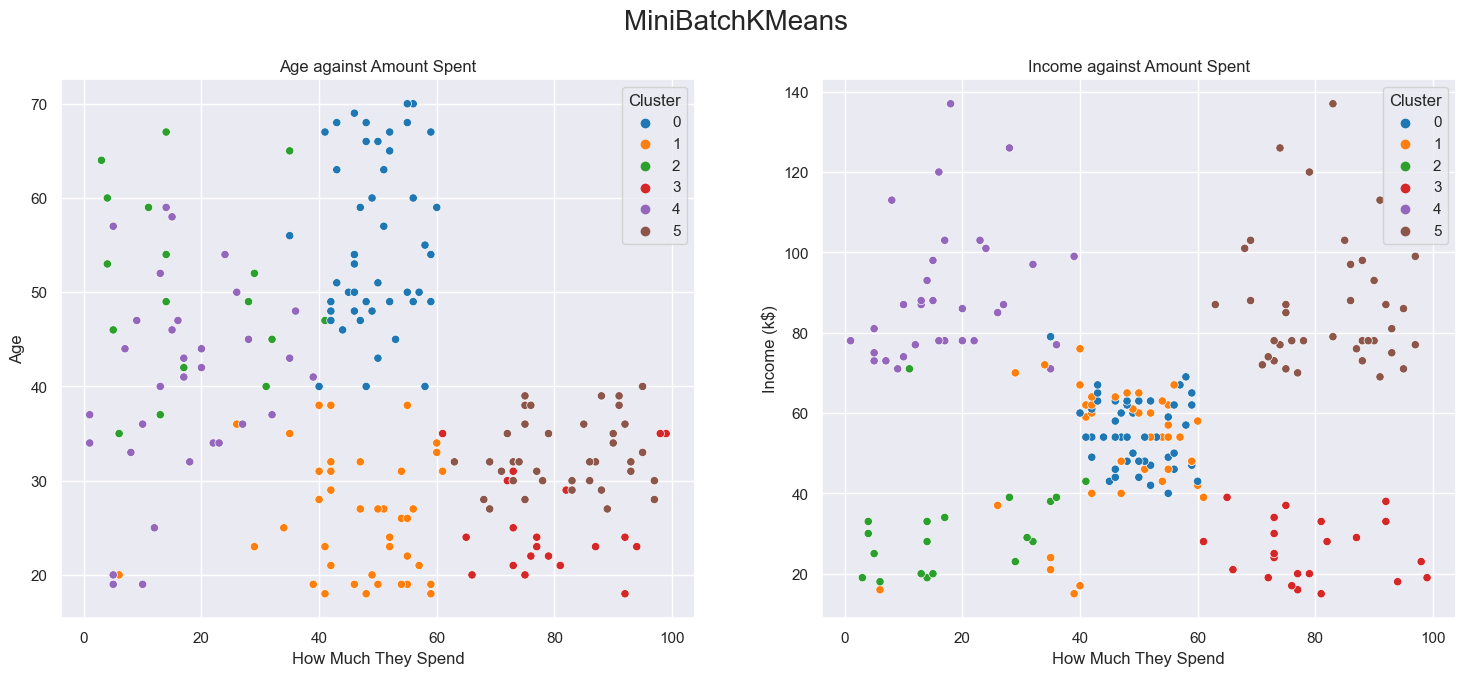

In [32]:
mb_kmeans_data = data.copy()
mb_kmeans_model = MiniBatchKMeans(n_clusters=ideal_k, random_state = seed)
mb_kmeans_data["Cluster"] = mb_kmeans_model.fit_predict(mb_kmeans_data)
cluster_visualization(mb_kmeans_data, suptitle = "MiniBatchKMeans", inversed = False)

<hr>
<font size = 5>Evaluating Results</font>
<hr>

To help us evaluate which model performs the best, and hence should be hypertuned, we shall use a combination of Silhouette score, as well as the Calinski-Harabasz Index (Variance Ratio Criterion). These scores were generated using the `cluster_vizualization` function we created earlier.


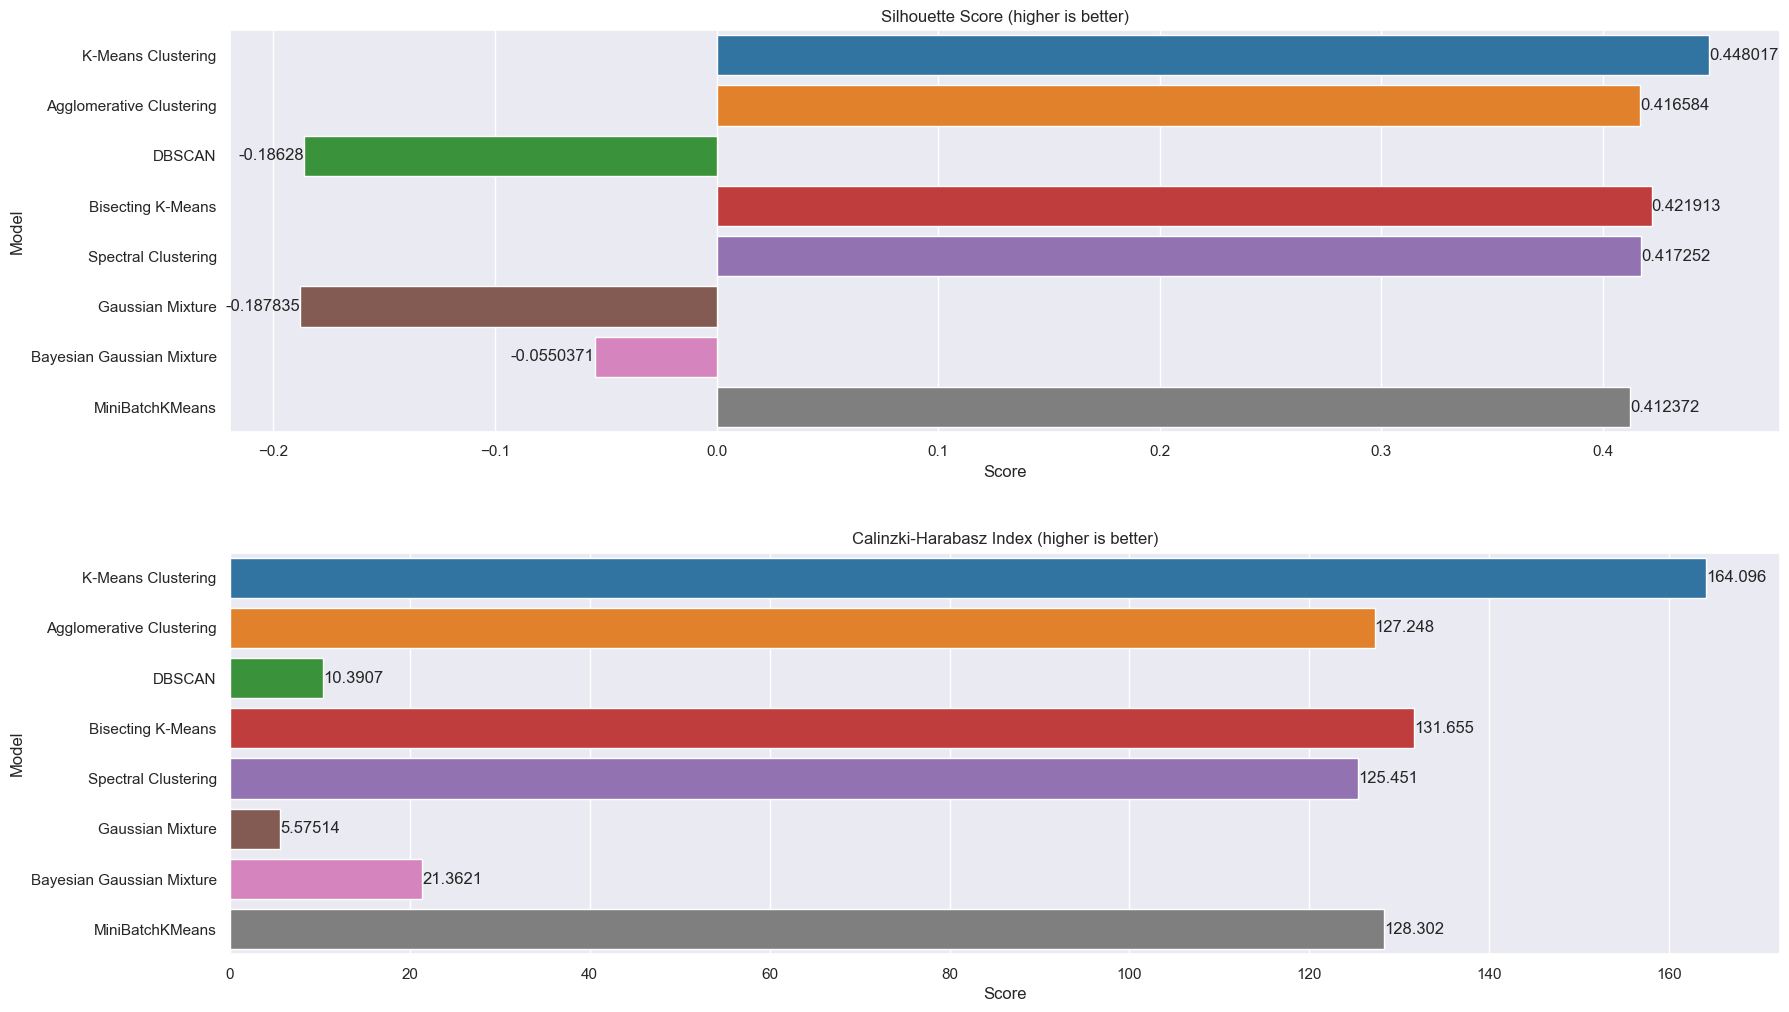

In [33]:
sil_model_score_df = pd.DataFrame(list(sil_model_score.items()), columns = ["Model", "Score"])
ch_model_score_df = pd.DataFrame(list(ch_model_score.items()), columns = ["Model", "Score"])

fig, ax = plt.subplots(2,1, figsize = (20,12))
sns.barplot(data = sil_model_score_df, y = "Model", x = "Score", ax = ax[0])
sns.barplot(data = ch_model_score_df, y = "Model", x = "Score", ax = ax[1])

for container1, container2 in zip(ax[0].containers, ax[1].containers):
    ax[0].bar_label(container1)
    ax[1].bar_label(container2)

ax[0].set_title("Silhouette Score (higher is better)")
ax[1].set_title("Calinzki-Harabasz Index (higher is better)")

plt.subplots_adjust(wspace = 0.5, hspace = 0.3)
plt.show()

From the above, we can see that the K-Means model, as well as the Bisecting K-Means model performs quite well, as both of them have a high Silhouette score, from 0.42 to 0.44, as well as a high Calinzki-Harabasz Index score, ranging from 131 to 164. 

From the high score on the Calinzki-Harabasz Index, we can see that the clusters for the two selected models are already quite well defined, with very little overlapping compared to model like DBSCAN and GMM. However, we shall try to further tune and improve on these models to yield better clusters.

<hr>
<font size = 5>Model Improvement</font>
<hr>

In [34]:
def sil_scorer(model, X, y=None):
    preds = model.fit_predict(X)
    return silhouette_score(X, preds) if len(set(preds)) > 1 else float('nan')


{'algorithm': 'lloyd', 'init': 'k-means++', 'n_init': 7}
The silhouette score for the Tuned KMeans model is 0.4269
The score on the Calinski-Harabasz Index for the Tuned KMeans model is 135.0755


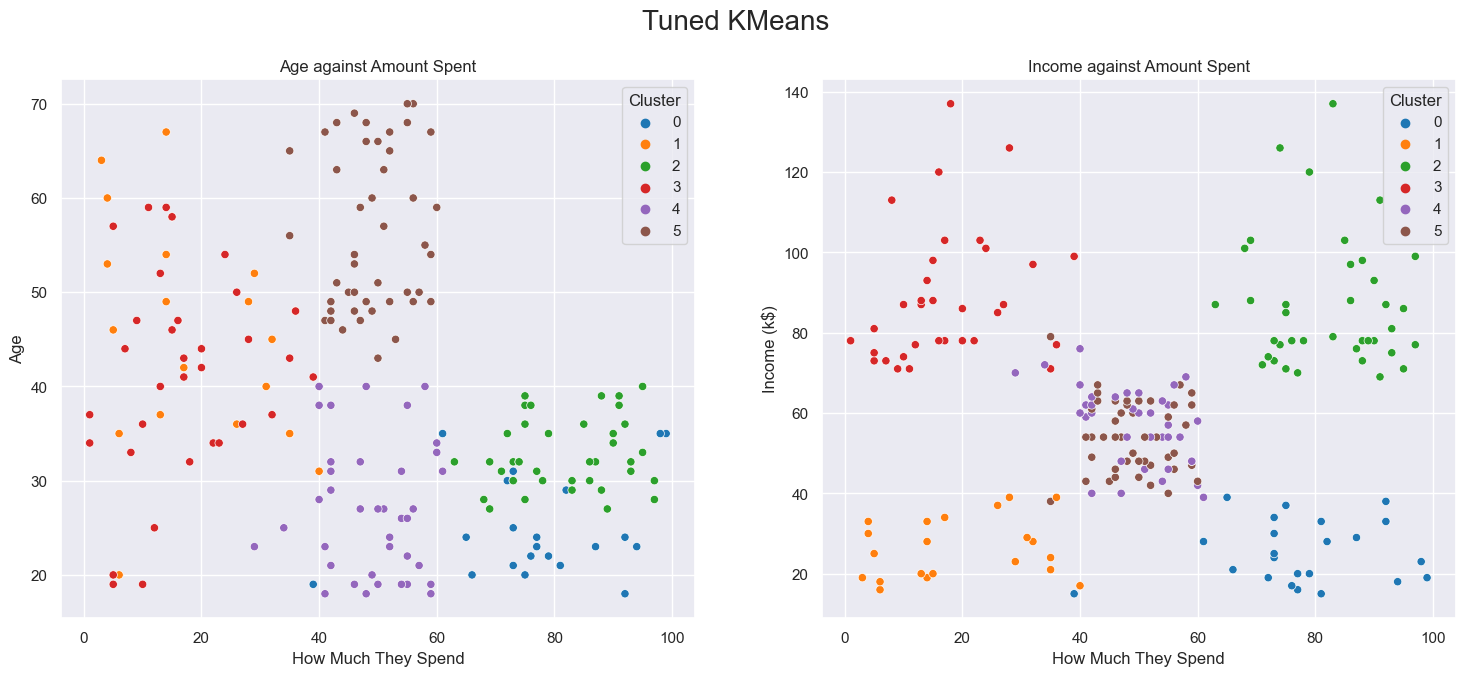

In [35]:
gridsearch_km_data = data.copy()
hypertuned_km_data = data.copy()

km_grid = dict(n_init=np.arange(1, 25, 1), init=["k-means++", "random"], algorithm=["lloyd", "elkan", "auto", "full"])
gridsearch_km = KMeans(n_clusters=ideal_k, random_state=seed)

km_grid_search = GridSearchCV(gridsearch_km, param_grid=km_grid, n_jobs=-1, verbose=-1, error_score="raise", cv = [(slice(None), slice(None))], scoring = sil_scorer)
km_search = km_grid_search.fit(gridsearch_km_data)

km_search_results = pd.DataFrame(km_search.cv_results_)
print(km_search.best_params_)

hypertuned_km = KMeans(n_clusters = ideal_k, random_state = seed, algorithm= km_search.best_params_['algorithm'], init = km_search.best_params_['init'], n_init = km_search.best_params_['n_init'])
hypertuned_km_data["Cluster"] = hypertuned_km.fit_predict(hypertuned_km_data)
cluster_visualization(hypertuned_km_data, suptitle = "Tuned KMeans", inversed = False)



{'algorithm': 'lloyd', 'bisecting_strategy': 'biggest_inertia', 'init': 'k-means++', 'n_init': 5}
The silhouette score for the Tuned BisectingKMeans model is 0.4189
The score on the Calinski-Harabasz Index for the Tuned BisectingKMeans model is 131.8378


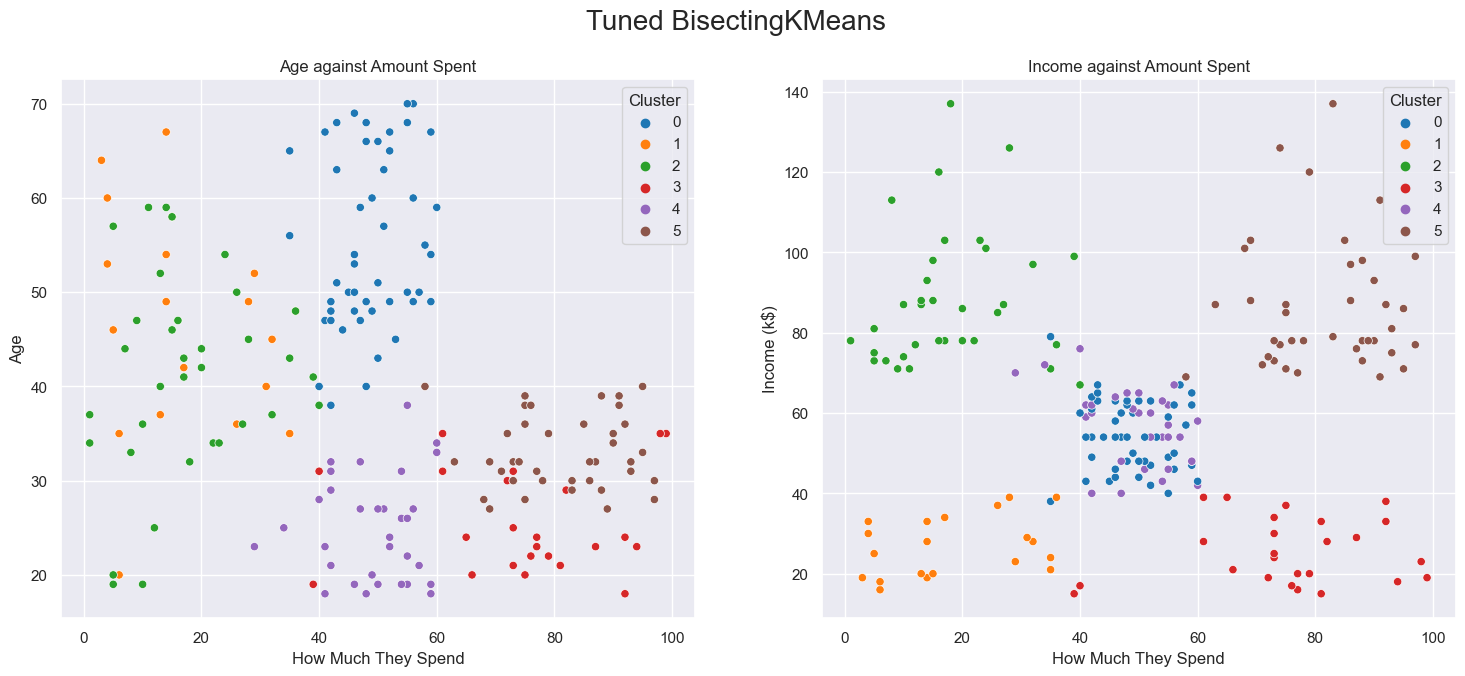

In [36]:
gridsearch_bkm_data = data.copy()
hypertuned_bkm_data = data.copy()

bkm_grid = dict(n_init=np.arange(5, 25, 1), init=["k-means++", "random"], algorithm=["lloyd", "elkan"], bisecting_strategy = ["biggest_inertia", "largest_cluster"])
gridsearch_bkm = BisectingKMeans(n_clusters=ideal_k, random_state=seed)

bkm_grid_search = GridSearchCV(gridsearch_bkm, param_grid=bkm_grid, n_jobs=-1, verbose=-1, error_score="raise", cv = [(slice(None), slice(None))], scoring = sil_scorer)
bkm_search = bkm_grid_search.fit(gridsearch_bkm_data)

bkm_search_results = pd.DataFrame(bkm_search.cv_results_)
print(bkm_search.best_params_)

hypertuned_bkm = BisectingKMeans(n_clusters = ideal_k, random_state = seed, algorithm= bkm_search.best_params_['algorithm'], init = bkm_search.best_params_['init'], n_init = bkm_search.best_params_['n_init'], bisecting_strategy= bkm_search.best_params_["bisecting_strategy"])
hypertuned_bkm_data["Cluster"] = hypertuned_bkm.fit_predict(hypertuned_bkm_data)
cluster_visualization(hypertuned_bkm_data, suptitle = "Tuned BisectingKMeans", inversed = False)

From the above section, we can see that there no improvement when we hypertune the models. Hence, we shall use the initial 6-cluster K-Means model as the final model, as it gave the highest silhouette score, and did the best on the Calinzki-Harabasz Index.

<hr>
<font size = 5>Cluster Intepretation</font>
<hr>

The silhouette score for the K-Means Clustering model is 0.4480
The score on the Calinski-Harabasz Index for the K-Means Clustering model is 164.0963


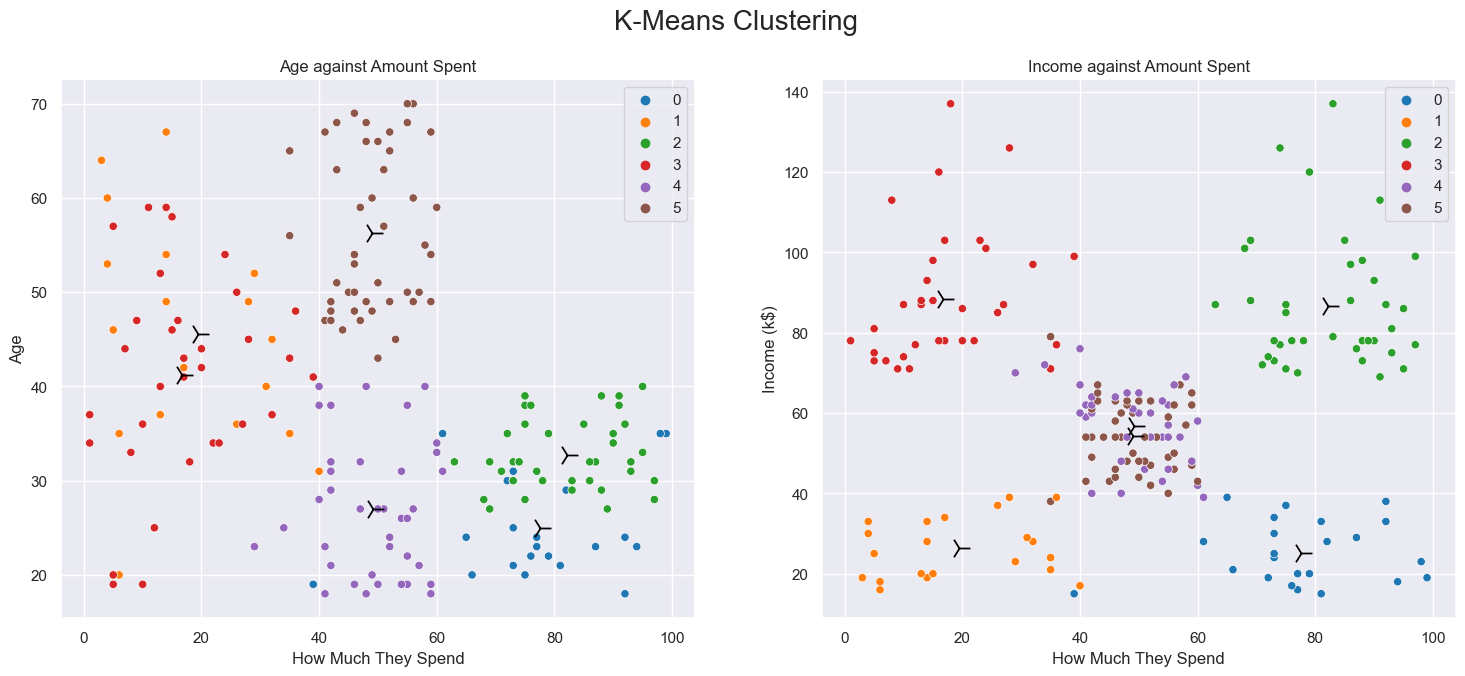

In [37]:
cluster_visualization(init_data_6, init_center_6, "K-Means Clustering")

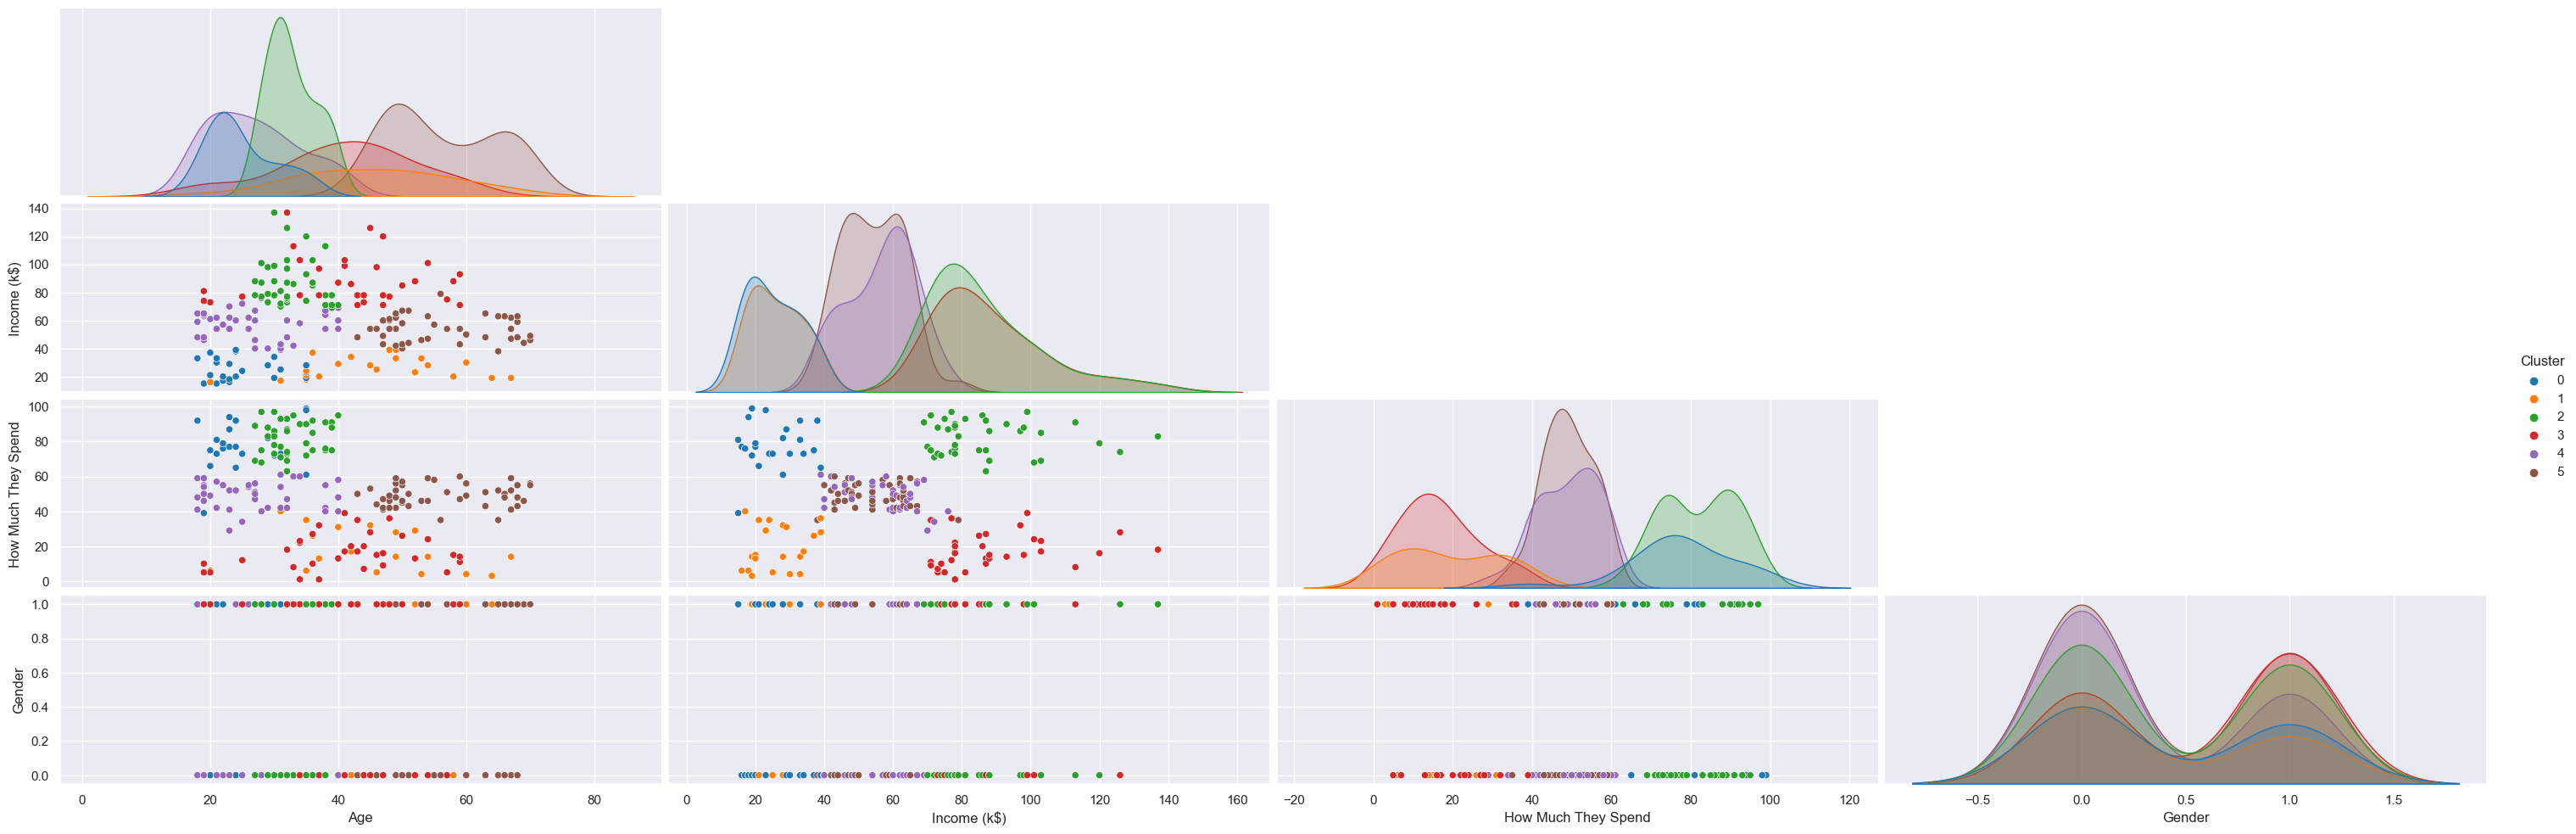

In [38]:
# plt.figure(figsize=(20,6))
sns.pairplot(init_data_6, hue = "Cluster", palette = custom_palette, corner = True, aspect = 3)
plt.show()

To help us better understand the distribution of clusters, we shall use a surrogate Decision Tree model, so that we can understand the distribution of each cluster.

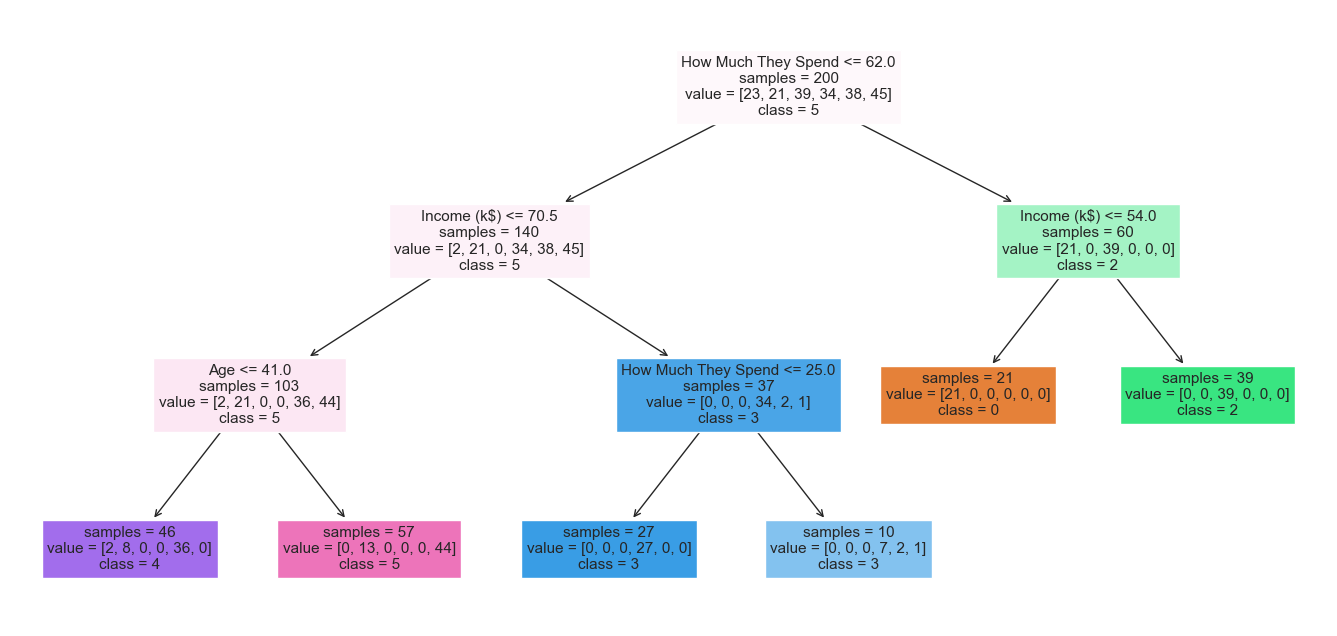

In [39]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

clf.fit(init_data_6.drop(columns='Cluster'), init_data_6['Cluster'])

fig, ax = plt.subplots(figsize = (17,8))
plot_tree(clf, feature_names = init_data_6.drop(columns='Cluster').columns, class_names= np.unique(init_data_6['Cluster'].values.astype(str)), impurity=False, filled = True, fontsize=11)
plt.show()

To better visualize the statistics of people in each cluster, we shall use a mix of boxplots and barplots.

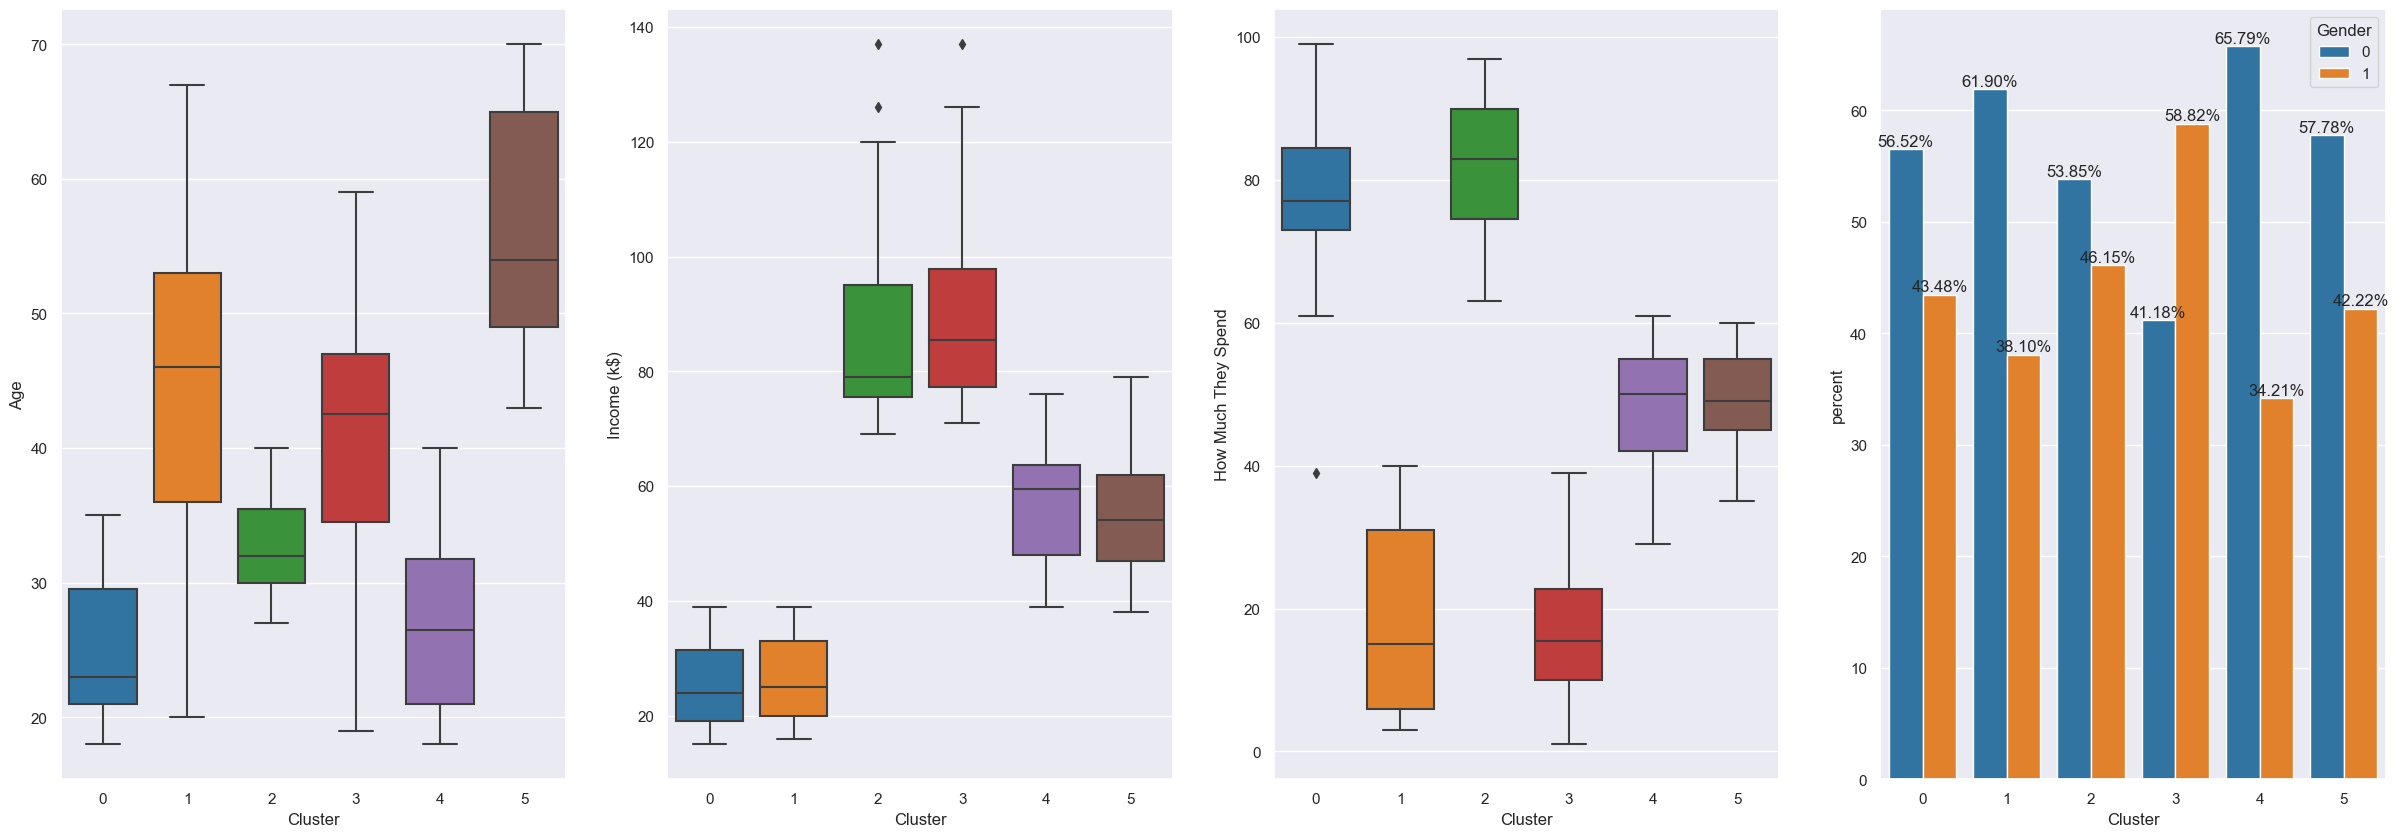

In [40]:
fig, ax = plt.subplots(1,4,figsize = (30,10))
gender_percentage = init_data_6.groupby("Cluster")["Gender"].value_counts(normalize=True).mul(100).rename('percent').reset_index()
# display(gender_percentage)

sns.boxplot(init_data_6, y = "Age", x = "Cluster", ax = ax[0])
sns.boxplot(init_data_6, y = "Income (k$)", x = "Cluster", ax = ax[1])
sns.boxplot(init_data_6, y = "How Much They Spend", x = "Cluster", ax = ax[2])
sns.barplot(gender_percentage, x = "Cluster", y = 'percent', hue = "Gender", ax = ax[3])

for container in ax[3].containers:
    ax[3].bar_label(container, fmt = '%.2f%%')

plt.show()

In [41]:
for i in range(0,6):
    display(init_data_6[init_data_6["Cluster"] == i].describe())

,Age,Income (k$),How Much They Spend,Gender,Cluster
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,25.000000,25.260870,77.608696,0.434783,0.0
std,5.300086,7.723738,13.272457,0.506870,0.0
min,18.000000,15.000000,39.000000,0.000000,0.0
25%,21.000000,19.000000,73.000000,0.000000,0.0
50%,23.000000,24.000000,77.000000,0.000000,0.0
75%,29.500000,31.500000,84.500000,1.000000,0.0
max,35.000000,39.000000,99.000000,1.000000,0.0


,Age,Income (k$),How Much They Spend,Gender,Cluster
count,21.000000,21.000000,21.000000,21.000000,21.0
mean,45.523810,26.285714,19.380952,0.380952,1.0
std,11.766984,7.437357,12.555780,0.497613,0.0
min,20.000000,16.000000,3.000000,0.000000,1.0
25%,36.000000,20.000000,6.000000,0.000000,1.0
50%,46.000000,25.000000,15.000000,0.000000,1.0
75%,53.000000,33.000000,31.000000,1.000000,1.0
max,67.000000,39.000000,40.000000,1.000000,1.0


,Age,Income (k$),How Much They Spend,Gender,Cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,32.692308,86.538462,82.128205,0.461538,2.0
std,3.728650,16.312485,9.364489,0.505035,0.0
min,27.000000,69.000000,63.000000,0.000000,2.0
25%,30.000000,75.500000,74.500000,0.000000,2.0
50%,32.000000,79.000000,83.000000,0.000000,2.0
75%,35.500000,95.000000,90.000000,1.000000,2.0
max,40.000000,137.000000,97.000000,1.000000,2.0


,Age,Income (k$),How Much They Spend,Gender,Cluster
count,34.000000,34.000000,34.000000,34.000000,34.0
mean,41.264706,88.500000,16.764706,0.588235,3.0
std,10.768385,16.533254,9.881292,0.499554,0.0
min,19.000000,71.000000,1.000000,0.000000,3.0
25%,34.500000,77.250000,10.000000,0.000000,3.0
50%,42.500000,85.500000,15.500000,1.000000,3.0
75%,47.000000,97.750000,22.750000,1.000000,3.0
max,59.000000,137.000000,39.000000,1.000000,3.0


,Age,Income (k$),How Much They Spend,Gender,Cluster
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,27.000000,56.657895,49.131579,0.342105,4.0
std,7.032742,9.905708,7.853975,0.480783,0.0
min,18.000000,39.000000,29.000000,0.000000,4.0
25%,21.000000,48.000000,42.000000,0.000000,4.0
50%,26.500000,59.500000,50.000000,0.000000,4.0
75%,31.750000,63.750000,55.000000,1.000000,4.0
max,40.000000,76.000000,61.000000,1.000000,4.0


,Age,Income (k$),How Much They Spend,Gender,Cluster
count,45.000000,45.000000,45.000000,45.000000,45.0
mean,56.333333,54.266667,49.066667,0.422222,5.0
std,8.453079,8.975725,6.300794,0.499495,0.0
min,43.000000,38.000000,35.000000,0.000000,5.0
25%,49.000000,47.000000,45.000000,0.000000,5.0
50%,54.000000,54.000000,49.000000,0.000000,5.0
75%,65.000000,62.000000,55.000000,1.000000,5.0
max,70.000000,79.000000,60.000000,1.000000,5.0


The following paragraphs are the interpretations of the clusters obtained.

**Cluster 0 (High-spending youths)**<br>
This cluster contains individuals who are younger and earn less, with a average age of 25, and a income of $25,600. However, they spend more compared to the rest, at $77, compared to the dataset average of $50. From the info, it can be seen that these individuals are ones who are more precious to the mall, as they are more likely to make larger purhcases, retaining tenants for longer.
<br>

**Cluster 1 (Good Financial Management)**<br>
This cluster contains individuals who are spread over a wide age group, but earn a relatively low amount. The minimum age in the cluster is 20 years old, and the maximum age is 67 years old. This suggests that the cluster is made up of people from a variety of age groups. The income levels are also quite spread out, with a std. dev. of $16k. However, they also spend quite little, with a mean spend of $16. This cluster is likely to be consistent spenders, given that they are more likely to spend within their means. 
<br>

**Cluster 2 (High-flying Individuals)**<br>
This cluster contains individuals who are middle aged, ranging between 27 and 40 years old, with the mean at 32.69 years of age. They also earn more compared to the rest of the customers, with a average income of $86.5k. The cluster is also relatively homogenous, with a standard deviation of 3.7 years for age, $16.3k for income, and $9.40 for spending, meaning that the data points in the cluster are all relatively close together. Overall, the group seems to be made of a group of young, high-income individuals, who bring in alot of money.
<br>

**Cluster 3 (Savvy Shoppers)**<br>
This cluster contains individuals who are wide age range, have a high income (average of $88.5k), but spend relatively little (average of $16.80). These people have the most "untapped potential" as customers, as they clearly have the money to spend, but yet decide to spend relatively little compared to others. The mall's management can look into enticing this cluster of individuals to spend more, either by offering more sales/promotions, or ways to find better prices, to maximise revenue.
<br>

**Cluster 4 (Modest Spenders)**<br>
This cluster is made up of young, middle-income, mostly female consumers (65.79%) who spend a moderate amount of money. The average age, income, and spending of this cluster is 27 years, $56.7k and $49.10 respectively. This group of individuals are likely to spend a moderate amount of money, and spend within their means, following their income.
<br>

**Cluster 5 (Older, middle-income consumers)**<br>
This cluster is made up of people who are older than most, with the age range being from 70 to 43 years old, with a std. dev of 8.4 years. This cluster also contains people who earn more than the dataset average, with a average income of $54.3k, a minimum of $38, and a maximum of $79k. This cluster of individuals are also average spenders, with a average of $49.10, a maximum of $60, and a minimum of $35. This group of customers make up the bread and butter of the mall, containing the most number of people, at 45.
<br>



<hr>
<font size = 5>Conclusion</font>
<hr>

From this exercise, the mall can conclude that it has 6 distinct groups of customers, each making up a different part of it's customer base.

If the mall were solely focussed on profits, it would look to maximising profits from individuals belonging to cluster 0, and cluster 2, as they spend the most, raking in the most revenue. The mall can likely do this by bringing in more fashion/technology brands, such as ADLV, Zara, and Apple. These brands are more likely to be popular with customers from those clusters, as they are younger people, who are willing to spend on more expensive, name-brand products.

If the mall were focused on long-term survival, it could focus more on Cluster 1/5. This is as customers in those clusters have better financial management, making them more likely to be consistent customers, coming back on a frequent basis to purchase items. Their spending behaviour is likely to be relatively consistent and hence, management can look to introduce sales/promotions on a more frequent basis to hopefully generate a pull factor, to keep these customers for longer.